Looking at whether all-vs-all overlaps returns more overlaps for a read compared to half-vs-half

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

In [2]:
with open("../tmp/longest.ids") as f:
    longest = set([line.strip() for line in f])

with open("../tmp/overlap.ids") as f:
    overlap = set([line.strip() for line in f])

assert len(longest) == len(overlap)

In [35]:
read_overlaps = {"hvh": Counter(), "ava": Counter()}
pair_counts = {"hvh": Counter(), "ava": Counter()}

In [36]:
with open("../tmp/AMtb_1.ava.paf") as paf:
    for line in paf:
        fields = line.split("\t")
        qname = fields[0]
        tname = fields[5]

        if qname in longest and tname in longest:
            continue
        elif qname in overlap and tname in overlap:
            continue

        pair = tuple(sorted([qname, tname]))
        read_overlaps["ava"][qname] += 1
        read_overlaps["ava"][tname] += 1
        pair_counts["ava"][pair] += 1

In [37]:
with open("../tmp/AMtb_1.hvh.dual.paf") as paf:
    for line in paf:
        fields = line.split("\t")
        qname = fields[0]
        tname = fields[5]
        pair = tuple(sorted([qname, tname]))
        read_overlaps["hvh"][qname] += 1
        read_overlaps["hvh"][tname] += 1
        pair_counts["hvh"][pair] += 1

In [38]:
print(f'{sum(read_overlaps["ava"].values())} overlaps in ava')
print(f'{sum(read_overlaps["hvh"].values())} overlaps in hvh')
2651942/1349422

2651942 overlaps in ava
2684050 overlaps in hvh


1.965242896588317

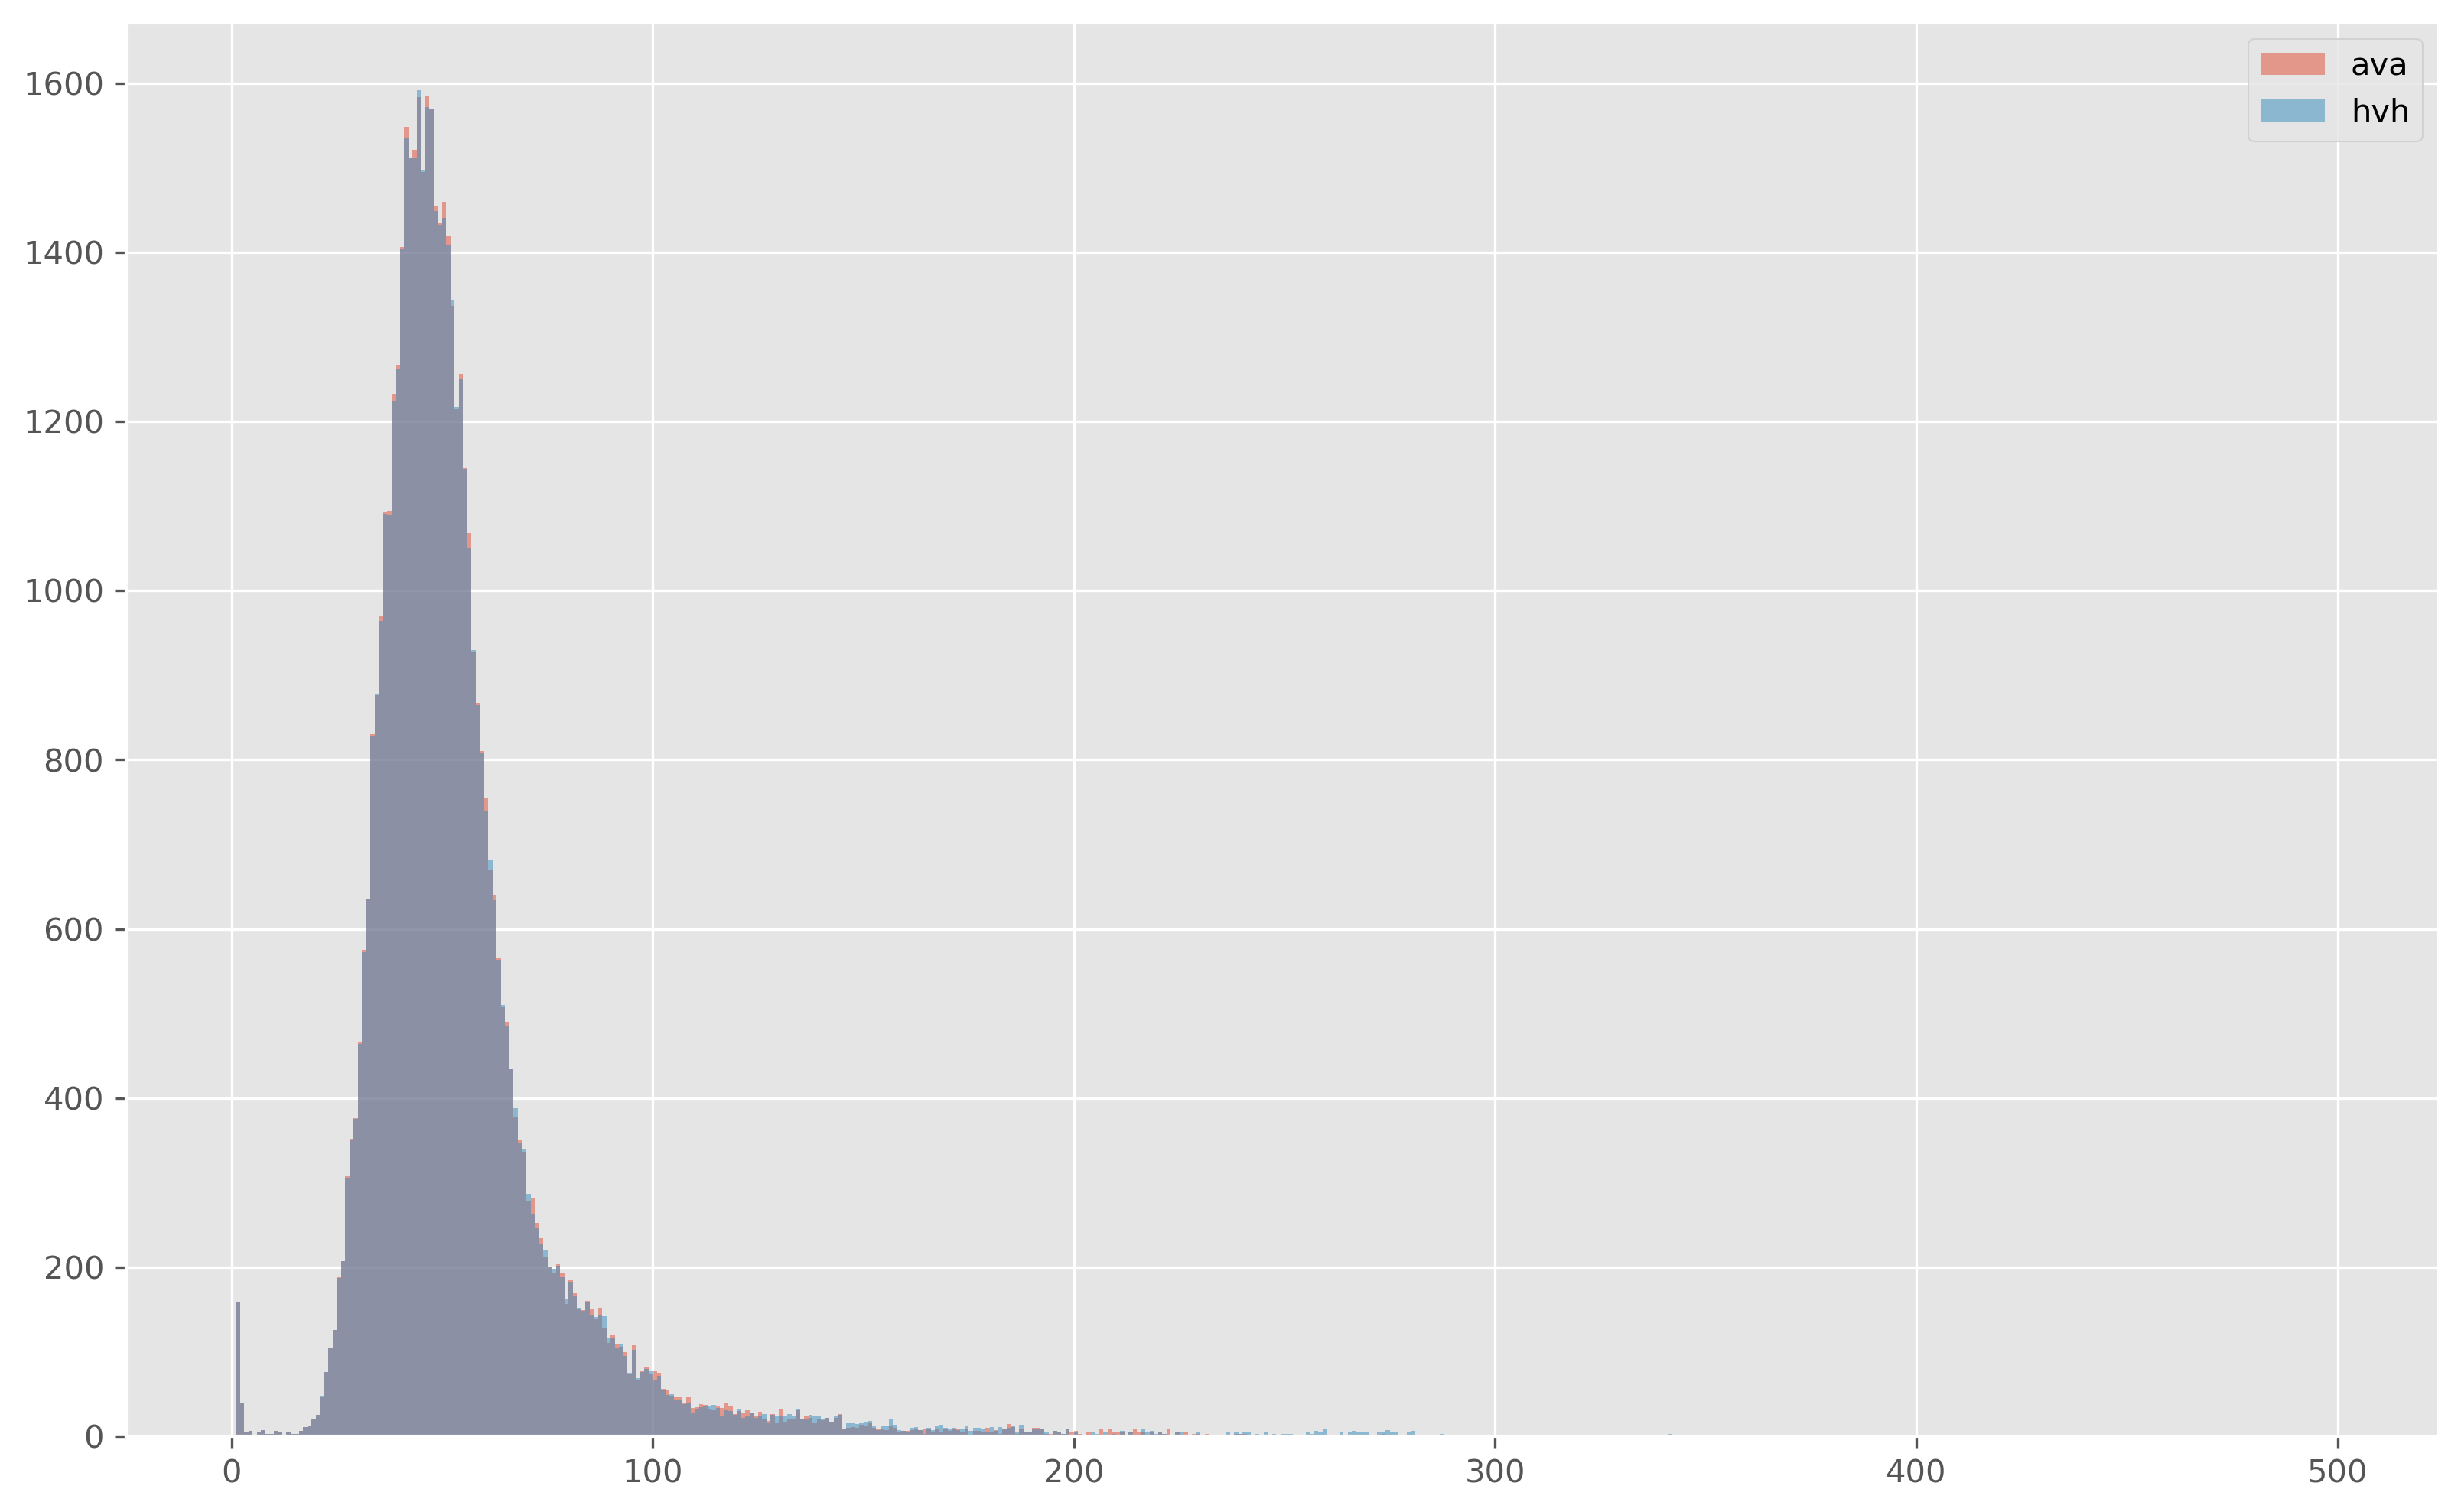

In [39]:
# plot histograms of the number of overlaps per read for ava and hvh
fig, ax = plt.subplots(dpi=300)
ax.hist(read_overlaps["ava"].values(), bins=range(0, 500, 1), alpha=0.5, label="ava")
ax.hist(read_overlaps["hvh"].values(), bins=range(0, 500, 1), alpha=0.5, label="hvh")
ax.legend()

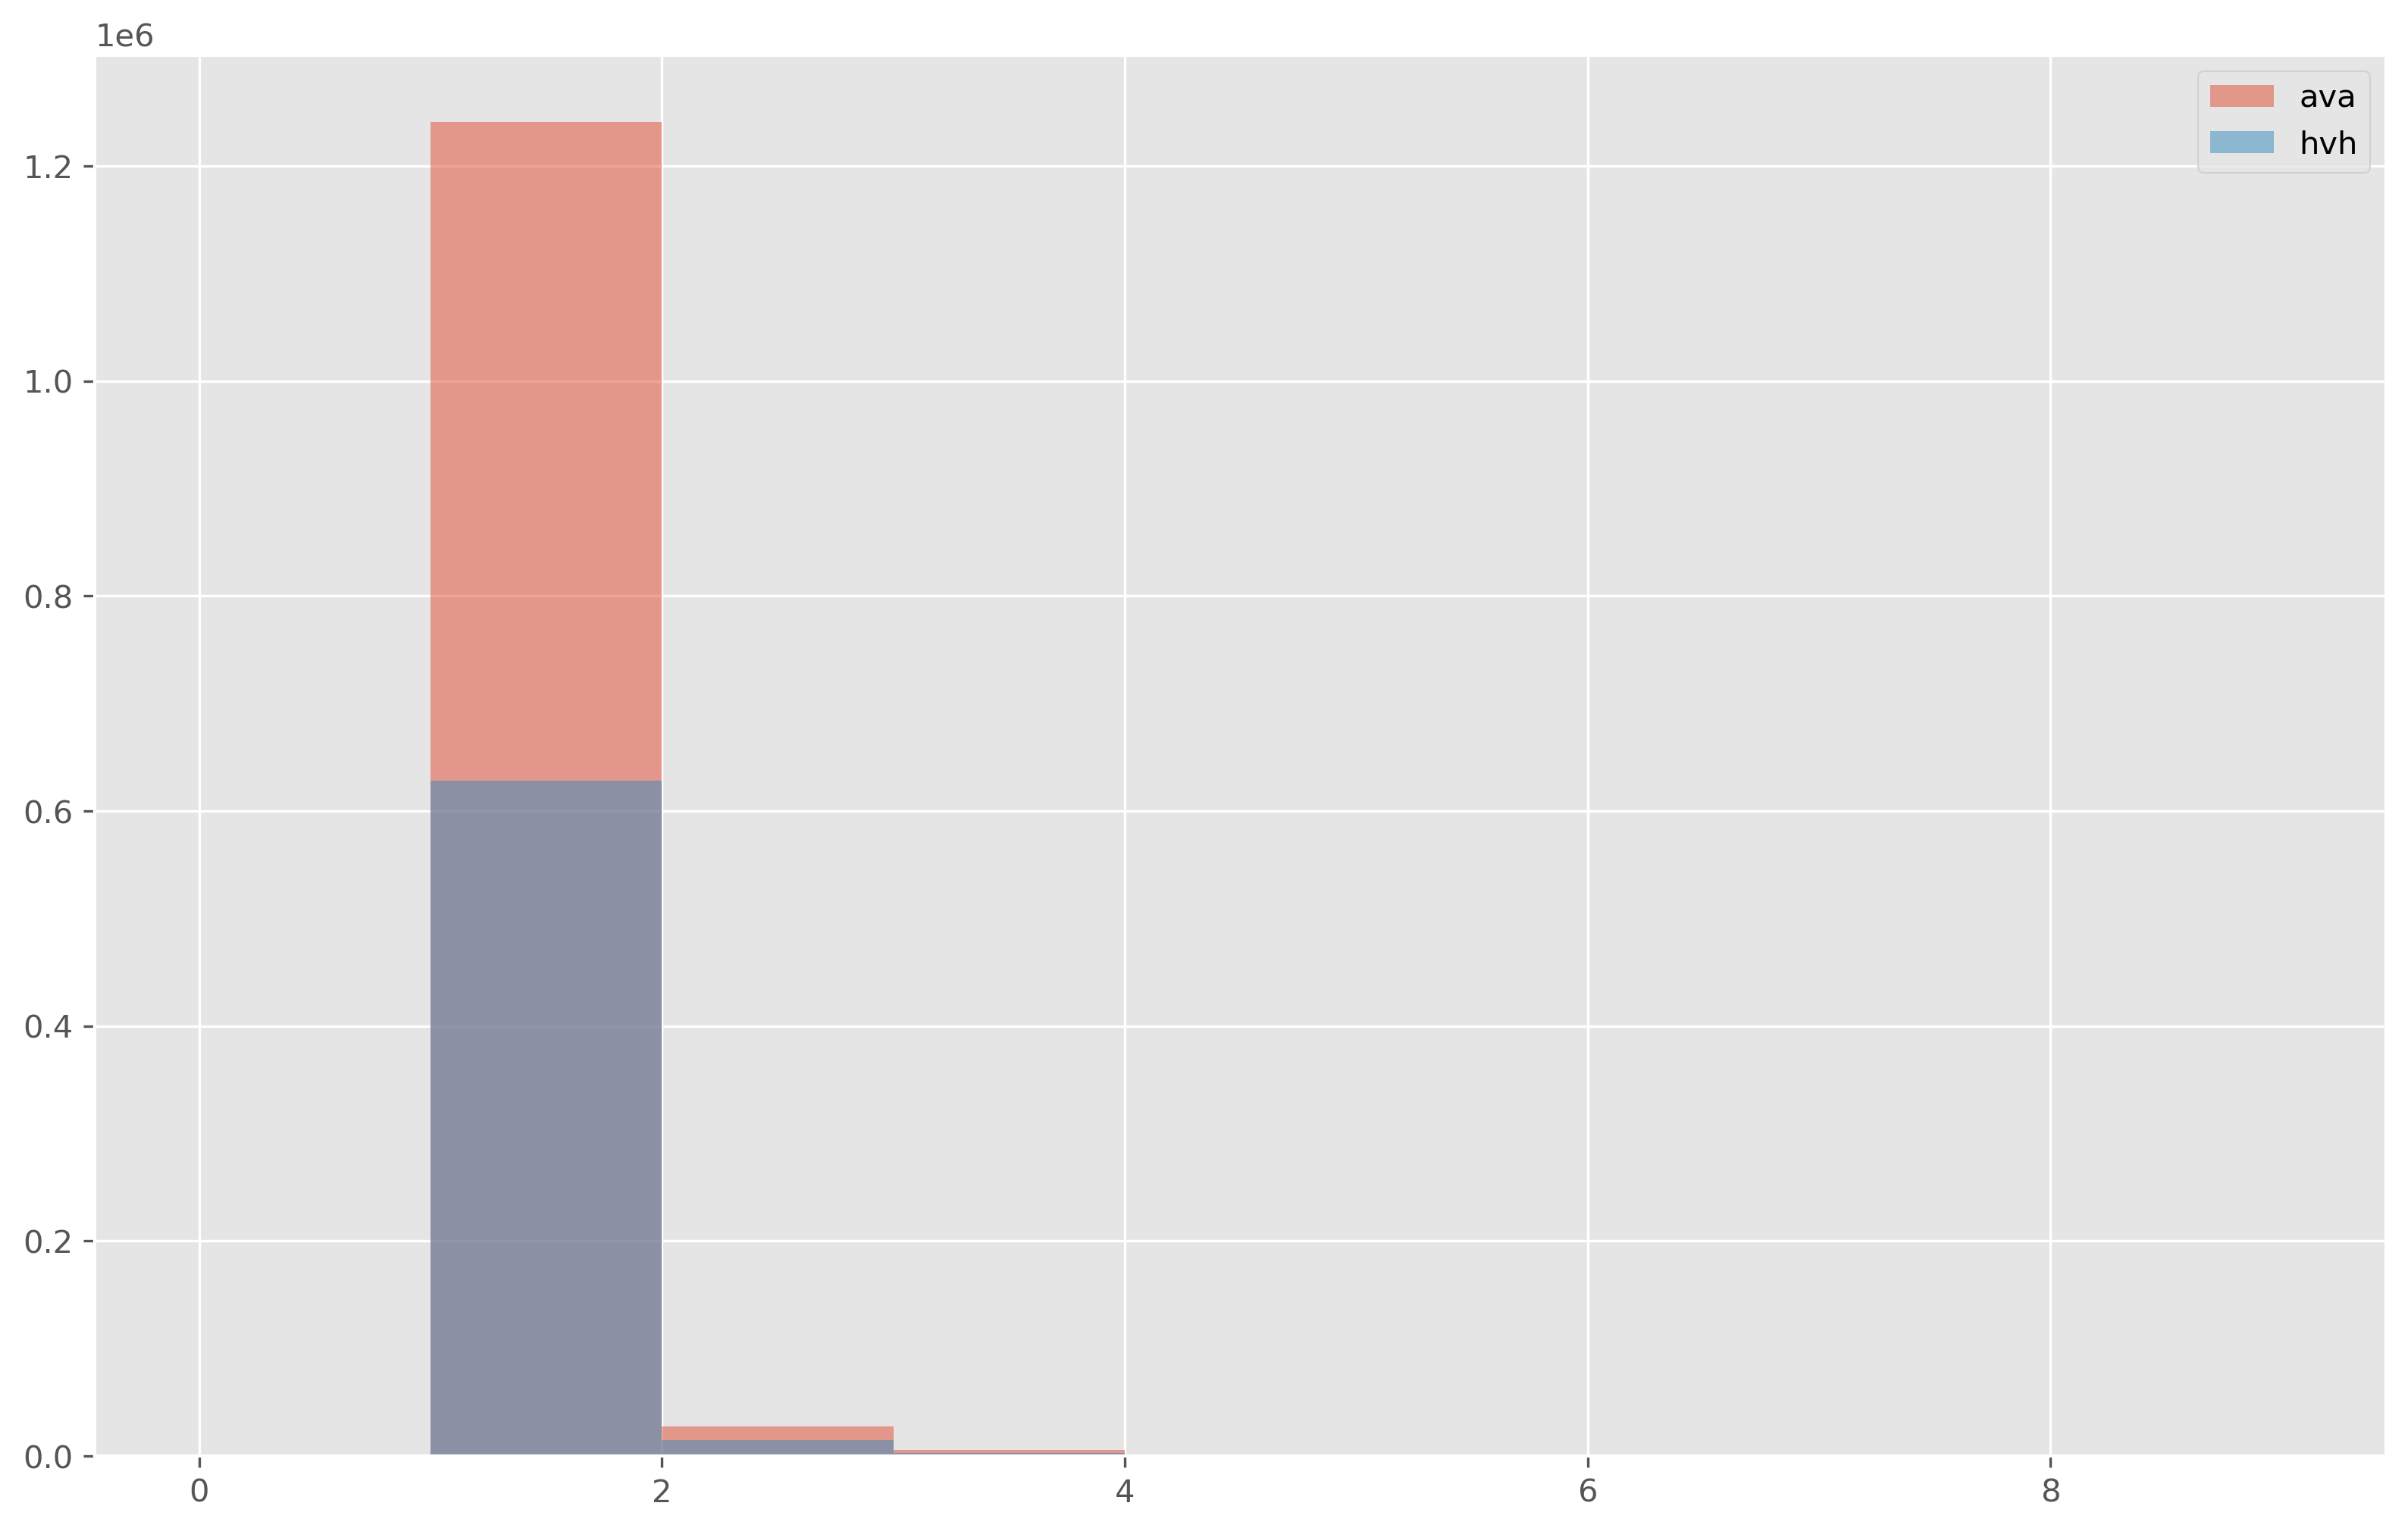

In [8]:
# plot histograms of the number of overlaps per pair for ava and hvh
fig, ax = plt.subplots(dpi=300)
ax.hist(pair_counts["ava"].values(), bins=range(0, 10, 1), alpha=0.5, label="ava")
ax.hist(pair_counts["hvh"].values(), bins=range(0, 10, 1), alpha=0.5, label="hvh")
ax.legend()

In [12]:
# list pairs with different number of overlaps in ava and hvh
num_posible_pairs = len(longest) * len(overlap)
print(f'{num_posible_pairs} possible pairs')
num_hvh_pairs = len(pair_counts["hvh"])
print(f'{num_hvh_pairs} ({num_hvh_pairs/num_posible_pairs:.2%}) pairs in hvh')
num_ava_pairs = len(pair_counts["ava"])
print(f'{num_ava_pairs} ({num_ava_pairs/num_posible_pairs:.2%}) pairs in ava')
num_common_pairs = len(set(pair_counts["hvh"].keys()).intersection(set(pair_counts["ava"].keys())))
num_common_pairs

625000000 possible pairs
647594 (0.10%) pairs in hvh
1276761 (0.20%) pairs in ava


641154

In [130]:
acc_col = "Assembly Accession"
df = pd.read_csv("../config/bacteria_lr.tsv", sep="\t", index_col=acc_col)
df

,Organism Name,Organism Taxonomic ID,Assembly BioProject Accession,Assembly BioSample Accession,Assembly Name,Organism Infraspecific Names Strain,Assembly BioSample Strain,Assembly Sequencing Tech,Assembly Stats Total Number of Chromosomes,Assembly Stats Total Sequence Length,Assembly Stats Genome Coverage,Assembly BioSample Project name,CheckM completeness,CheckM completeness percentile,CheckM contamination
Assembly Accession,,,,,,,,,,,,,,,
GCF_002057455.1,[Actinomadura] parvosata subsp. kistnae,1909395,PRJNA348567,SAMN05912833,ASM205745v1,ATCC 55076,ATCC 55076,PacBio,1,13047416,110.0x,NaN,92.82,100.000,15.00
GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,ATCC 21022,ATCC 21022,Illumina NextSeq; Oxford Nanopore GridION,1,4434229,100.0x,NaN,99.74,100.000,0.18
GCF_003595605.1,[Bacillus] caldolyticus,1394,PRJNA420054,SAMN08104862,ASM359560v1,NEB414,NEB414,PacBio,2,3485582,159.9x,NaN,99.50,100.000,0.33
GCF_000987865.1,[Brevibacterium] flavum,92706,PRJNA279429,SAMN03494310,ASM98786v1,ATCC 15168,ATCC 15168,Miseq PE 300; PacBio 10K,1,3338699,736.0x,NaN,99.49,100.000,NaN
GCF_001683055.1,[Brevibacterium] flavum ZL-1,1232385,PRJNA175240,SAMN05366914,ASM168305v1,ZL-1,ZL-1,PacBio,1,3340941,NaN,NaN,97.92,50.000,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_027594405.1,Zunongwangia sp. HRR-M8,3015170,PRJNA678113,SAMN32236257,ASM2759440v1,HRR-M8,HRR-M8,PacBio Sequel; Illumina,1,3876143,279.6x,NaN,100.00,100.000,0.16
GCF_019904275.1,Zunongwangia sp. SCSIO 43204,2779359,PRJNA668462,SAMN16409657,ASM1990427v1,SCSIO 43204,SCSIO 43204,PacBio RSII,1,4599919,100.0x,NaN,100.00,100.000,0.16
GCF_019316745.1,Zymomonas mobilis,542,PRJNA745480,SAMN20166874,ASM1931674v1,ZM401,ZM401,Illumina HiSeq; PacBio RS,5,2204959,211.0x,NaN,97.69,75.000,3.51


In [131]:
covg_col = "Assembly Stats Genome Coverage"
covg = []
for c in df[covg_col]:
    if type(c) == float or pd.isna(c):
        covg.append(c)
    else:
        c = float(c.replace("x", ""))
        covg.append(c)

In [132]:
df[covg_col] = covg

In [133]:
# get list of biosample accessions that are duplicated
biosample_col = "Assembly BioSample Accession"
duplicated_biosamples = df[df.duplicated(subset=biosample_col)][biosample_col].unique()
drop_indices = []
for acc in duplicated_biosamples:
    subdf = df[df[biosample_col] == acc]
    # get a list of the indices of those rows that don't have the highest coverage
    highest_covg = subdf[covg_col].idxmax()
    drop_indices.extend(subdf[subdf.index != highest_covg].index)


In [134]:
# drop the duplicated rows with lower coverage
df = df.drop(drop_indices)
df

,Organism Name,Organism Taxonomic ID,Assembly BioProject Accession,Assembly BioSample Accession,Assembly Name,Organism Infraspecific Names Strain,Assembly BioSample Strain,Assembly Sequencing Tech,Assembly Stats Total Number of Chromosomes,Assembly Stats Total Sequence Length,Assembly Stats Genome Coverage,Assembly BioSample Project name,CheckM completeness,CheckM completeness percentile,CheckM contamination
Assembly Accession,,,,,,,,,,,,,,,
GCF_002057455.1,[Actinomadura] parvosata subsp. kistnae,1909395,PRJNA348567,SAMN05912833,ASM205745v1,ATCC 55076,ATCC 55076,PacBio,1,13047416,110.0,NaN,92.82,100.000,15.00
GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,ATCC 21022,ATCC 21022,Illumina NextSeq; Oxford Nanopore GridION,1,4434229,100.0,NaN,99.74,100.000,0.18
GCF_003595605.1,[Bacillus] caldolyticus,1394,PRJNA420054,SAMN08104862,ASM359560v1,NEB414,NEB414,PacBio,2,3485582,159.9,NaN,99.50,100.000,0.33
GCF_000987865.1,[Brevibacterium] flavum,92706,PRJNA279429,SAMN03494310,ASM98786v1,ATCC 15168,ATCC 15168,Miseq PE 300; PacBio 10K,1,3338699,736.0,NaN,99.49,100.000,NaN
GCF_001683055.1,[Brevibacterium] flavum ZL-1,1232385,PRJNA175240,SAMN05366914,ASM168305v1,ZL-1,ZL-1,PacBio,1,3340941,NaN,NaN,97.92,50.000,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_027594405.1,Zunongwangia sp. HRR-M8,3015170,PRJNA678113,SAMN32236257,ASM2759440v1,HRR-M8,HRR-M8,PacBio Sequel; Illumina,1,3876143,279.6,NaN,100.00,100.000,0.16
GCF_019904275.1,Zunongwangia sp. SCSIO 43204,2779359,PRJNA668462,SAMN16409657,ASM1990427v1,SCSIO 43204,SCSIO 43204,PacBio RSII,1,4599919,100.0,NaN,100.00,100.000,0.16
GCF_019316745.1,Zymomonas mobilis,542,PRJNA745480,SAMN20166874,ASM1931674v1,ZM401,ZM401,Illumina HiSeq; PacBio RS,5,2204959,211.0,NaN,97.69,75.000,3.51


In [135]:
import re

ont_regex = re.compile(r"Oxford|ONT|ION|OXFORD|Nano[pP]ore|NativeBarcoding")
pb_regex = re.compile(r"SMRT|PacBio|Sequel|sequel|Revio|Pacific|pacbio|Pacbio")
illumina_regex = re.compile(r"ill|umina|MiSeq|HiSeq|NextSeq|NovaSeq|iSeq", re.IGNORECASE)
other_regex = re.compile(r"454|Roche|MGI|DNB|BGI|Torrent|Bluepippin|Complete Genomics|Ion\s?PGM|Applied Biosystems|DNASEQ|DBNSEQ|IonProton|Sanger|ABI|SOLiD|Helicos|Element|Gen[eo]Lab|OpGen", re.IGNORECASE)

def standardise_tech(s: str) -> set[str]:
    techs_present = set()
    if ont_regex.search(s):
        techs_present.add("ONT")
    if pb_regex.search(s):
        techs_present.add("PacBio")
    if illumina_regex.search(s):
        techs_present.add("Illumina")
    if other_regex.search(s):
        techs_present.add("Other")
    return techs_present

In [136]:
# remove rows with missing technology
tech_col = "Assembly Sequencing Tech"
df = df[~df[tech_col].isna()]

In [137]:
new_techs = []
for val in df[tech_col]:
    techs = standardise_tech(val.strip())
    new_techs.append(";".join(techs))

In [138]:
df[tech_col] = new_techs

/tmp/ipykernel_263215/1045865421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tech_col] = new_techs


In [139]:
df

,Organism Name,Organism Taxonomic ID,Assembly BioProject Accession,Assembly BioSample Accession,Assembly Name,Organism Infraspecific Names Strain,Assembly BioSample Strain,Assembly Sequencing Tech,Assembly Stats Total Number of Chromosomes,Assembly Stats Total Sequence Length,Assembly Stats Genome Coverage,Assembly BioSample Project name,CheckM completeness,CheckM completeness percentile,CheckM contamination
Assembly Accession,,,,,,,,,,,,,,,
GCF_002057455.1,[Actinomadura] parvosata subsp. kistnae,1909395,PRJNA348567,SAMN05912833,ASM205745v1,ATCC 55076,ATCC 55076,PacBio,1,13047416,110.0,NaN,92.82,100.000,15.00
GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,ATCC 21022,ATCC 21022,ONT;Illumina,1,4434229,100.0,NaN,99.74,100.000,0.18
GCF_003595605.1,[Bacillus] caldolyticus,1394,PRJNA420054,SAMN08104862,ASM359560v1,NEB414,NEB414,PacBio,2,3485582,159.9,NaN,99.50,100.000,0.33
GCF_000987865.1,[Brevibacterium] flavum,92706,PRJNA279429,SAMN03494310,ASM98786v1,ATCC 15168,ATCC 15168,PacBio;Illumina,1,3338699,736.0,NaN,99.49,100.000,NaN
GCF_001683055.1,[Brevibacterium] flavum ZL-1,1232385,PRJNA175240,SAMN05366914,ASM168305v1,ZL-1,ZL-1,PacBio,1,3340941,NaN,NaN,97.92,50.000,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_027594405.1,Zunongwangia sp. HRR-M8,3015170,PRJNA678113,SAMN32236257,ASM2759440v1,HRR-M8,HRR-M8,PacBio;Illumina,1,3876143,279.6,NaN,100.00,100.000,0.16
GCF_019904275.1,Zunongwangia sp. SCSIO 43204,2779359,PRJNA668462,SAMN16409657,ASM1990427v1,SCSIO 43204,SCSIO 43204,PacBio,1,4599919,100.0,NaN,100.00,100.000,0.16
GCF_019316745.1,Zymomonas mobilis,542,PRJNA745480,SAMN20166874,ASM1931674v1,ZM401,ZM401,PacBio;Illumina,5,2204959,211.0,NaN,97.69,75.000,3.51


In [140]:
# list rows which do not contain Illumina or Other technology
df[~df[tech_col].str.contains("Illumina|Other")]

,Organism Name,Organism Taxonomic ID,Assembly BioProject Accession,Assembly BioSample Accession,Assembly Name,Organism Infraspecific Names Strain,Assembly BioSample Strain,Assembly Sequencing Tech,Assembly Stats Total Number of Chromosomes,Assembly Stats Total Sequence Length,Assembly Stats Genome Coverage,Assembly BioSample Project name,CheckM completeness,CheckM completeness percentile,CheckM contamination
Assembly Accession,,,,,,,,,,,,,,,
GCF_002057455.1,[Actinomadura] parvosata subsp. kistnae,1909395,PRJNA348567,SAMN05912833,ASM205745v1,ATCC 55076,ATCC 55076,PacBio,1,13047416,110.0,NaN,92.82,100.0,15.00
GCF_003595605.1,[Bacillus] caldolyticus,1394,PRJNA420054,SAMN08104862,ASM359560v1,NEB414,NEB414,PacBio,2,3485582,159.9,NaN,99.50,100.0,0.33
GCF_001683055.1,[Brevibacterium] flavum ZL-1,1232385,PRJNA175240,SAMN05366914,ASM168305v1,ZL-1,ZL-1,PacBio,1,3340941,NaN,NaN,97.92,50.0,0.34
GCF_027941655.1,[Clostridium] scindens,29347,PRJNA902789,SAMN31775693,ASM2794165v1,VPI12708,VPI12708,PacBio,1,3983052,50.0,NaN,99.38,100.0,NaN
GCF_004295125.1,[Clostridium] scindens ATCC 35704,411468,PRJNA508260,SAMN10519000,ASM429512v1,ATCC 35704,ATCC 35704,PacBio,1,3658040,300.0,NaN,99.38,100.0,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,ASM435352v2,K32,K32,ONT,1,3314304,400.0,NaN,99.09,100.0,1.82
GCF_001586255.1,Zhongshania aliphaticivorans,1470434,PRJNA306719,SAMN04361929,ASM158625v1,SM-2,SM-2,PacBio,1,4204359,198.0,NaN,99.44,60.0,1.12
GCF_041950555.1,Zobellella sp. DQSA1,3342386,PRJNA1156831,SAMN43501998,ASM4195055v1,DQSA1,DQSA1,PacBio,1,4201419,197.7,NaN,99.05,100.0,2.81


In [141]:
df.to_csv("../tmp/bacteria_lr.filtered.tsv", sep="\t")

In [142]:
df.head()

,Organism Name,Organism Taxonomic ID,Assembly BioProject Accession,Assembly BioSample Accession,Assembly Name,Organism Infraspecific Names Strain,Assembly BioSample Strain,Assembly Sequencing Tech,Assembly Stats Total Number of Chromosomes,Assembly Stats Total Sequence Length,Assembly Stats Genome Coverage,Assembly BioSample Project name,CheckM completeness,CheckM completeness percentile,CheckM contamination
Assembly Accession,,,,,,,,,,,,,,,
GCF_002057455.1,[Actinomadura] parvosata subsp. kistnae,1909395,PRJNA348567,SAMN05912833,ASM205745v1,ATCC 55076,ATCC 55076,PacBio,1,13047416,110.0,NaN,92.82,100.0,15.00
GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,ATCC 21022,ATCC 21022,ONT;Illumina,1,4434229,100.0,NaN,99.74,100.0,0.18
GCF_003595605.1,[Bacillus] caldolyticus,1394,PRJNA420054,SAMN08104862,ASM359560v1,NEB414,NEB414,PacBio,2,3485582,159.9,NaN,99.50,100.0,0.33
GCF_000987865.1,[Brevibacterium] flavum,92706,PRJNA279429,SAMN03494310,ASM98786v1,ATCC 15168,ATCC 15168,PacBio;Illumina,1,3338699,736.0,NaN,99.49,100.0,NaN
GCF_001683055.1,[Brevibacterium] flavum ZL-1,1232385,PRJNA175240,SAMN05366914,ASM168305v1,ZL-1,ZL-1,PacBio,1,3340941,NaN,NaN,97.92,50.0,0.34


In [143]:
# how many assemblies have both pacbio and ont reads?
df[df[tech_col].str.contains("PacBio") & df[tech_col].str.contains("ONT")].shape[0]

51

In [144]:
# how many rows are missing checkM data
checkm_cols = ["CheckM completeness", "CheckM contamination", "CheckM completeness percentile"]
df[df[checkm_cols].isna().any(axis=1)].shape[0]

2521

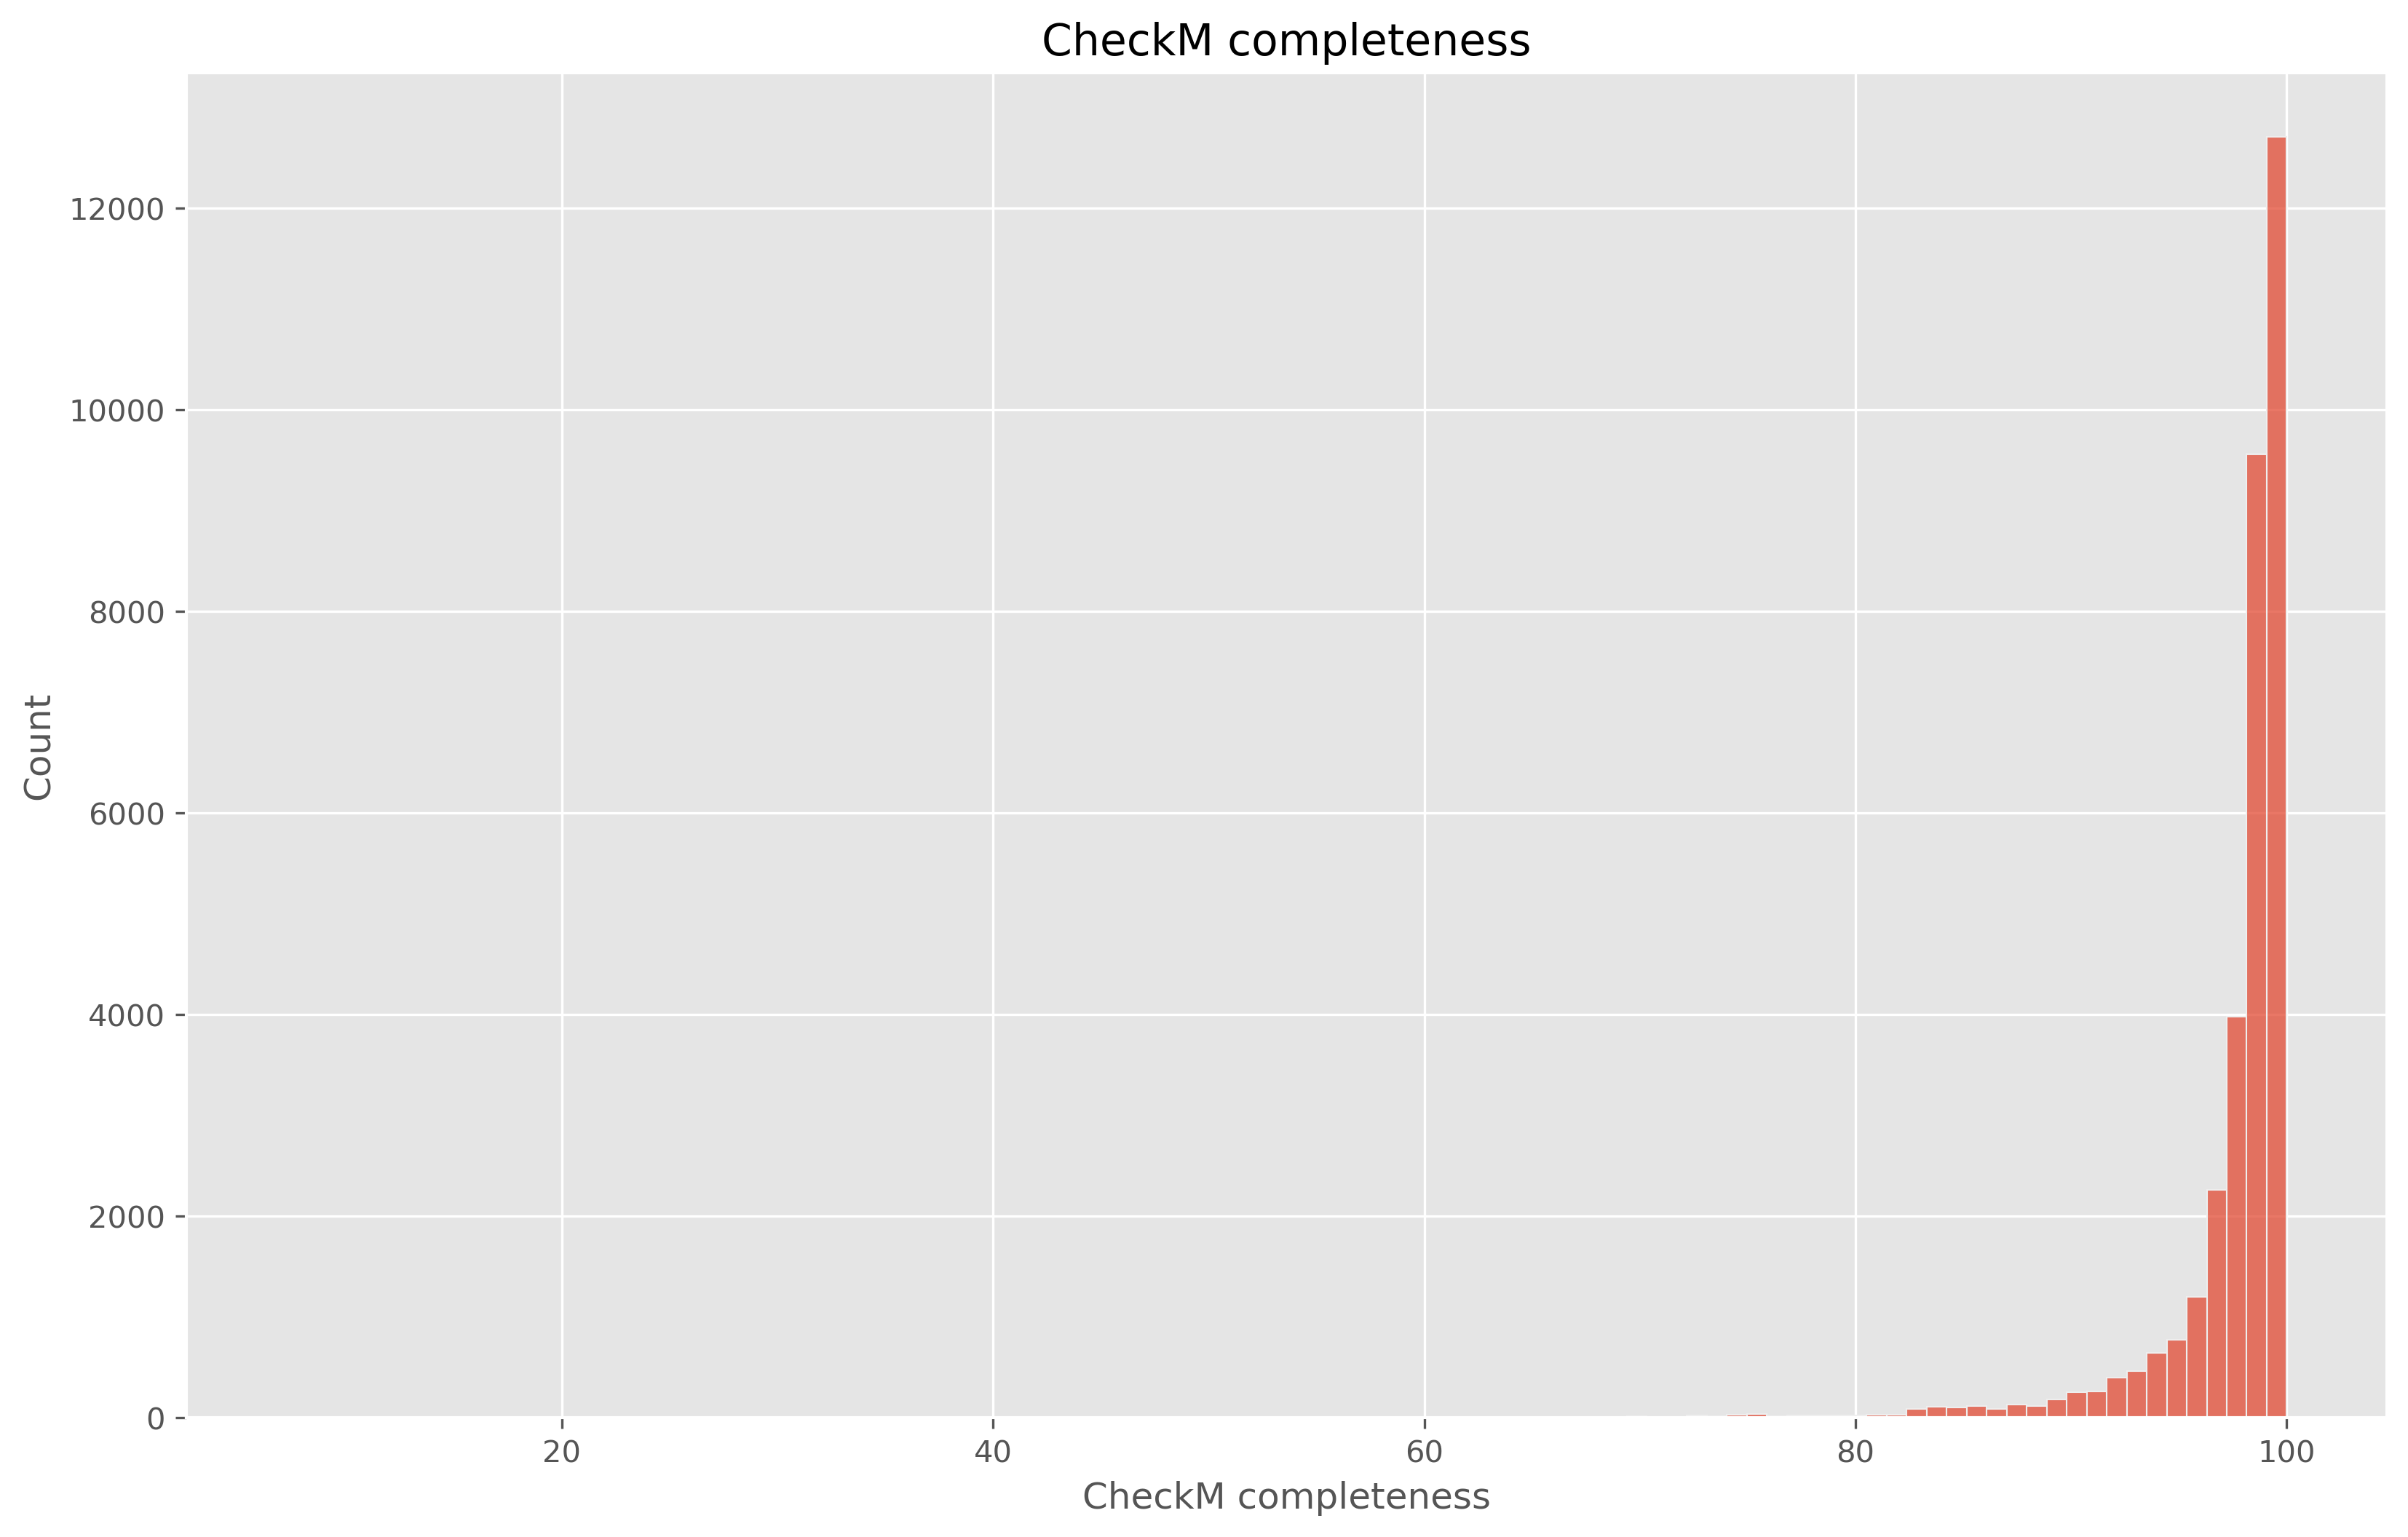

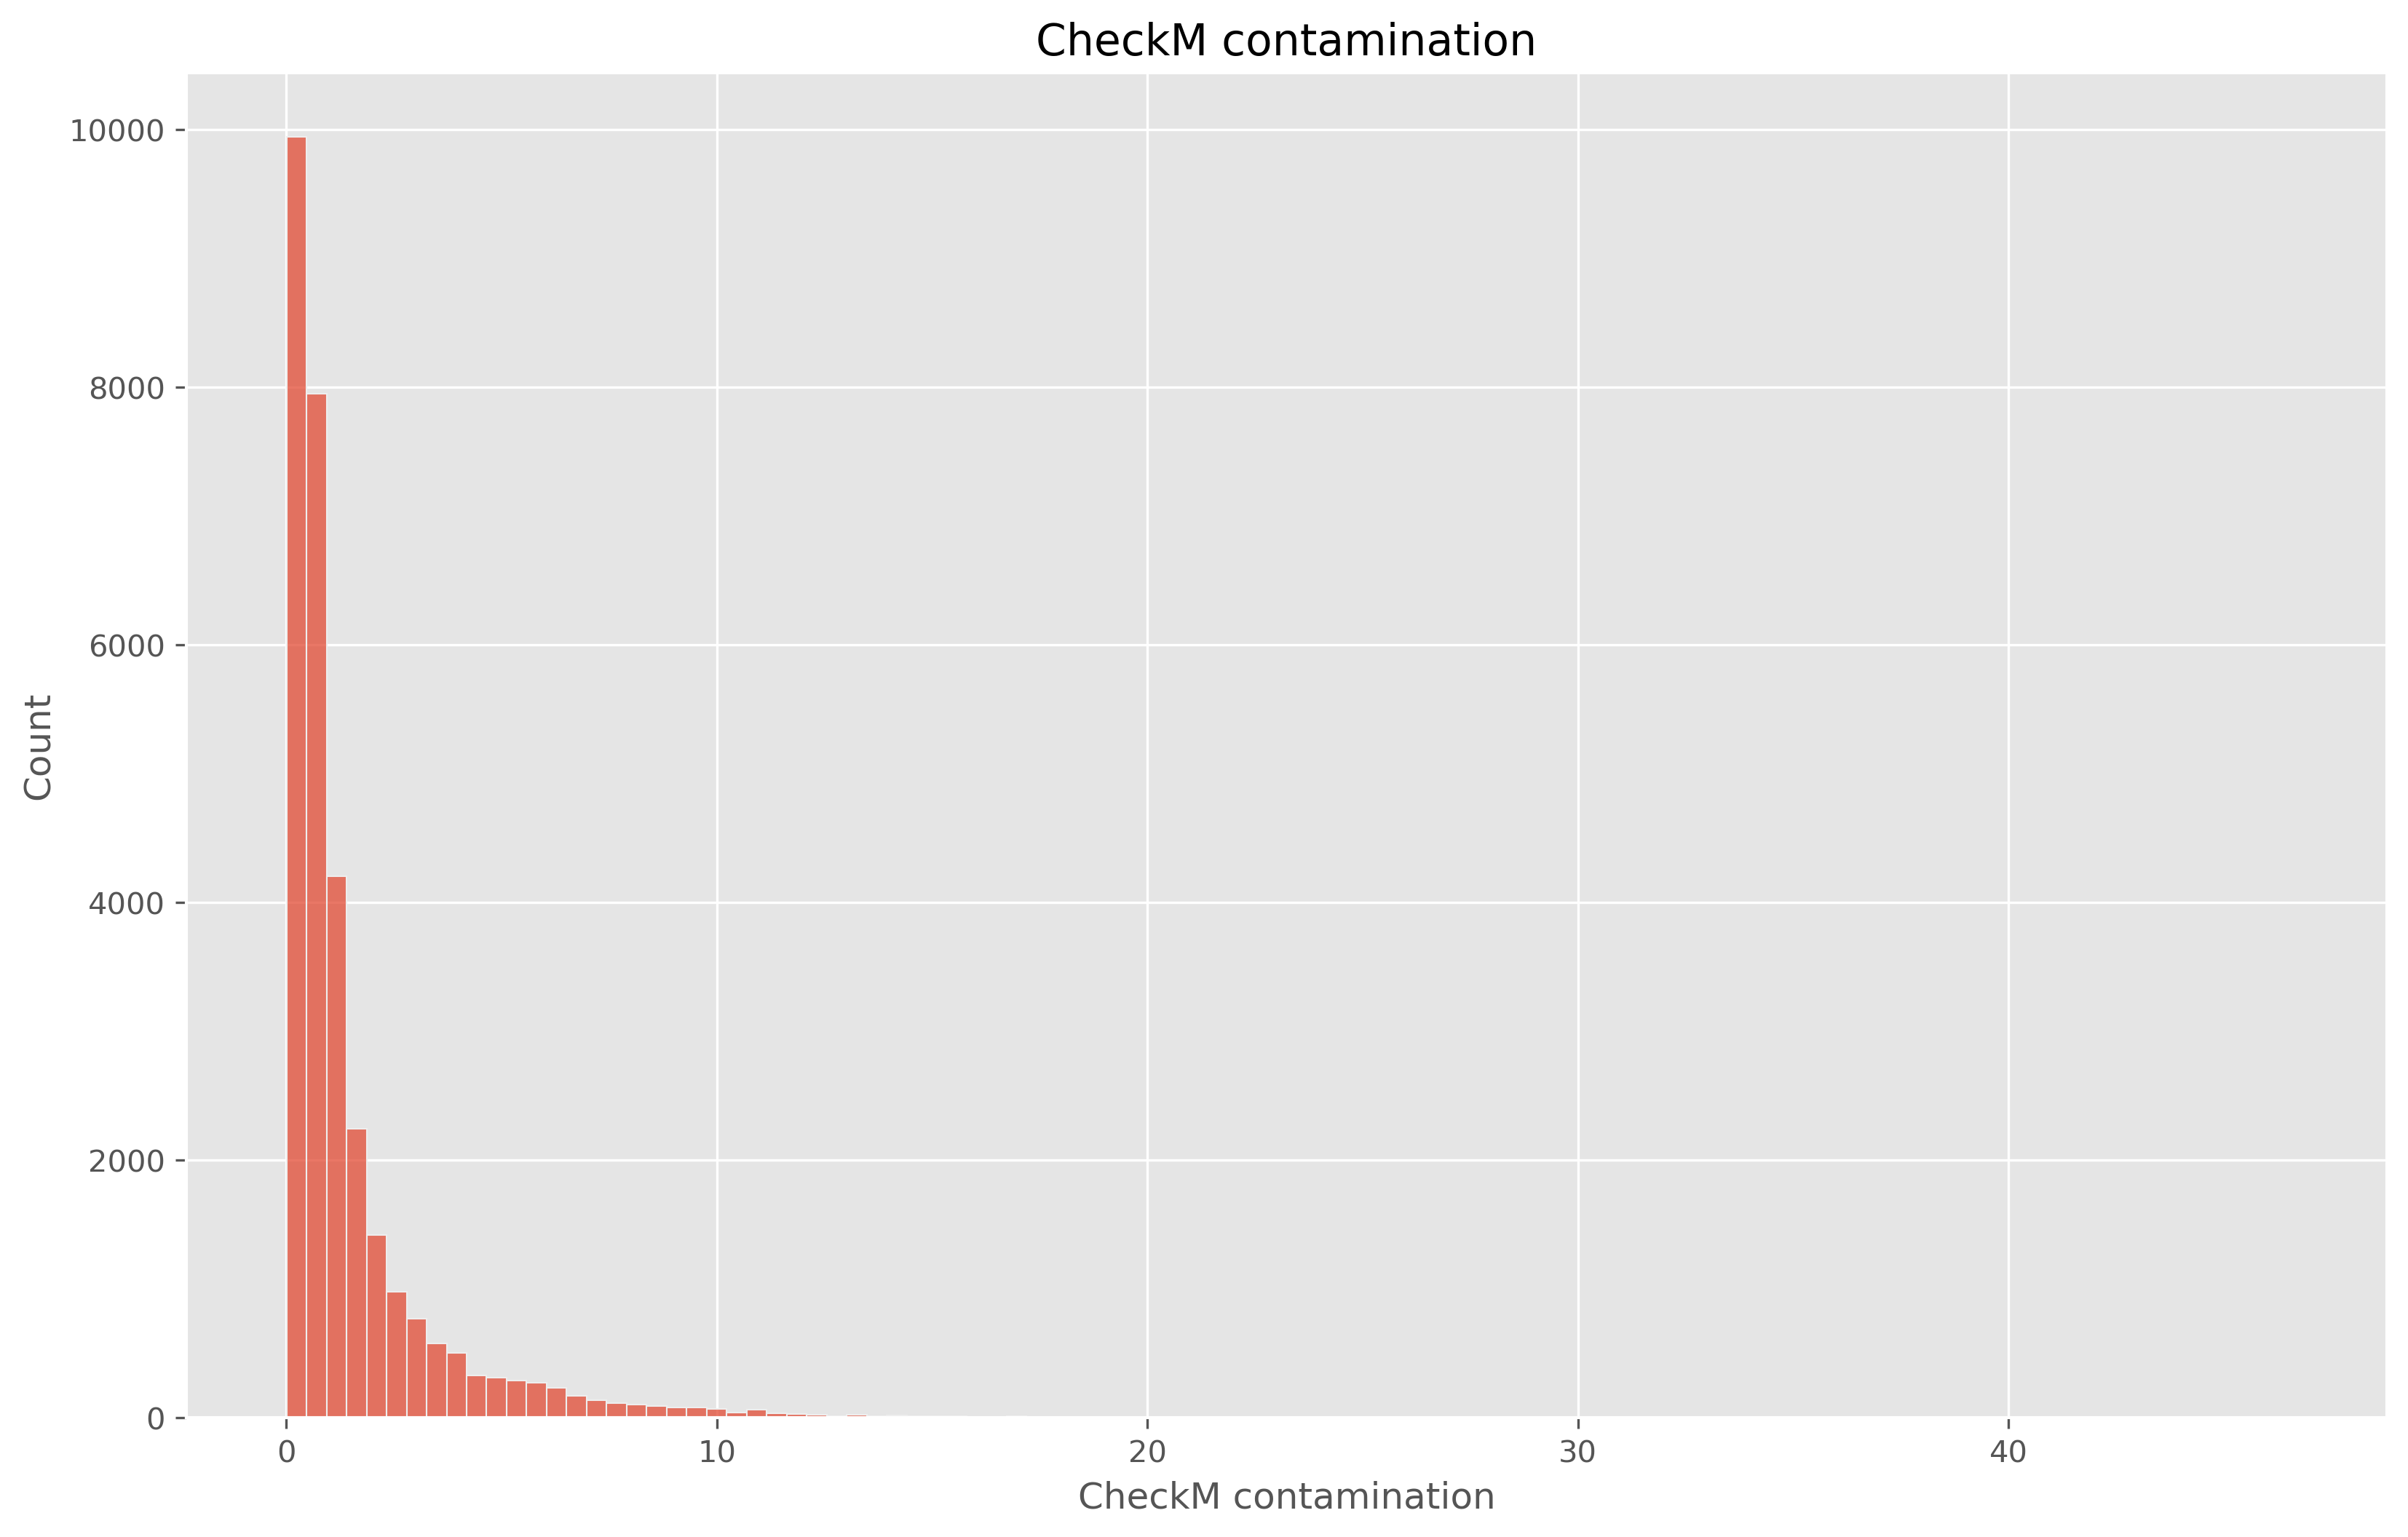

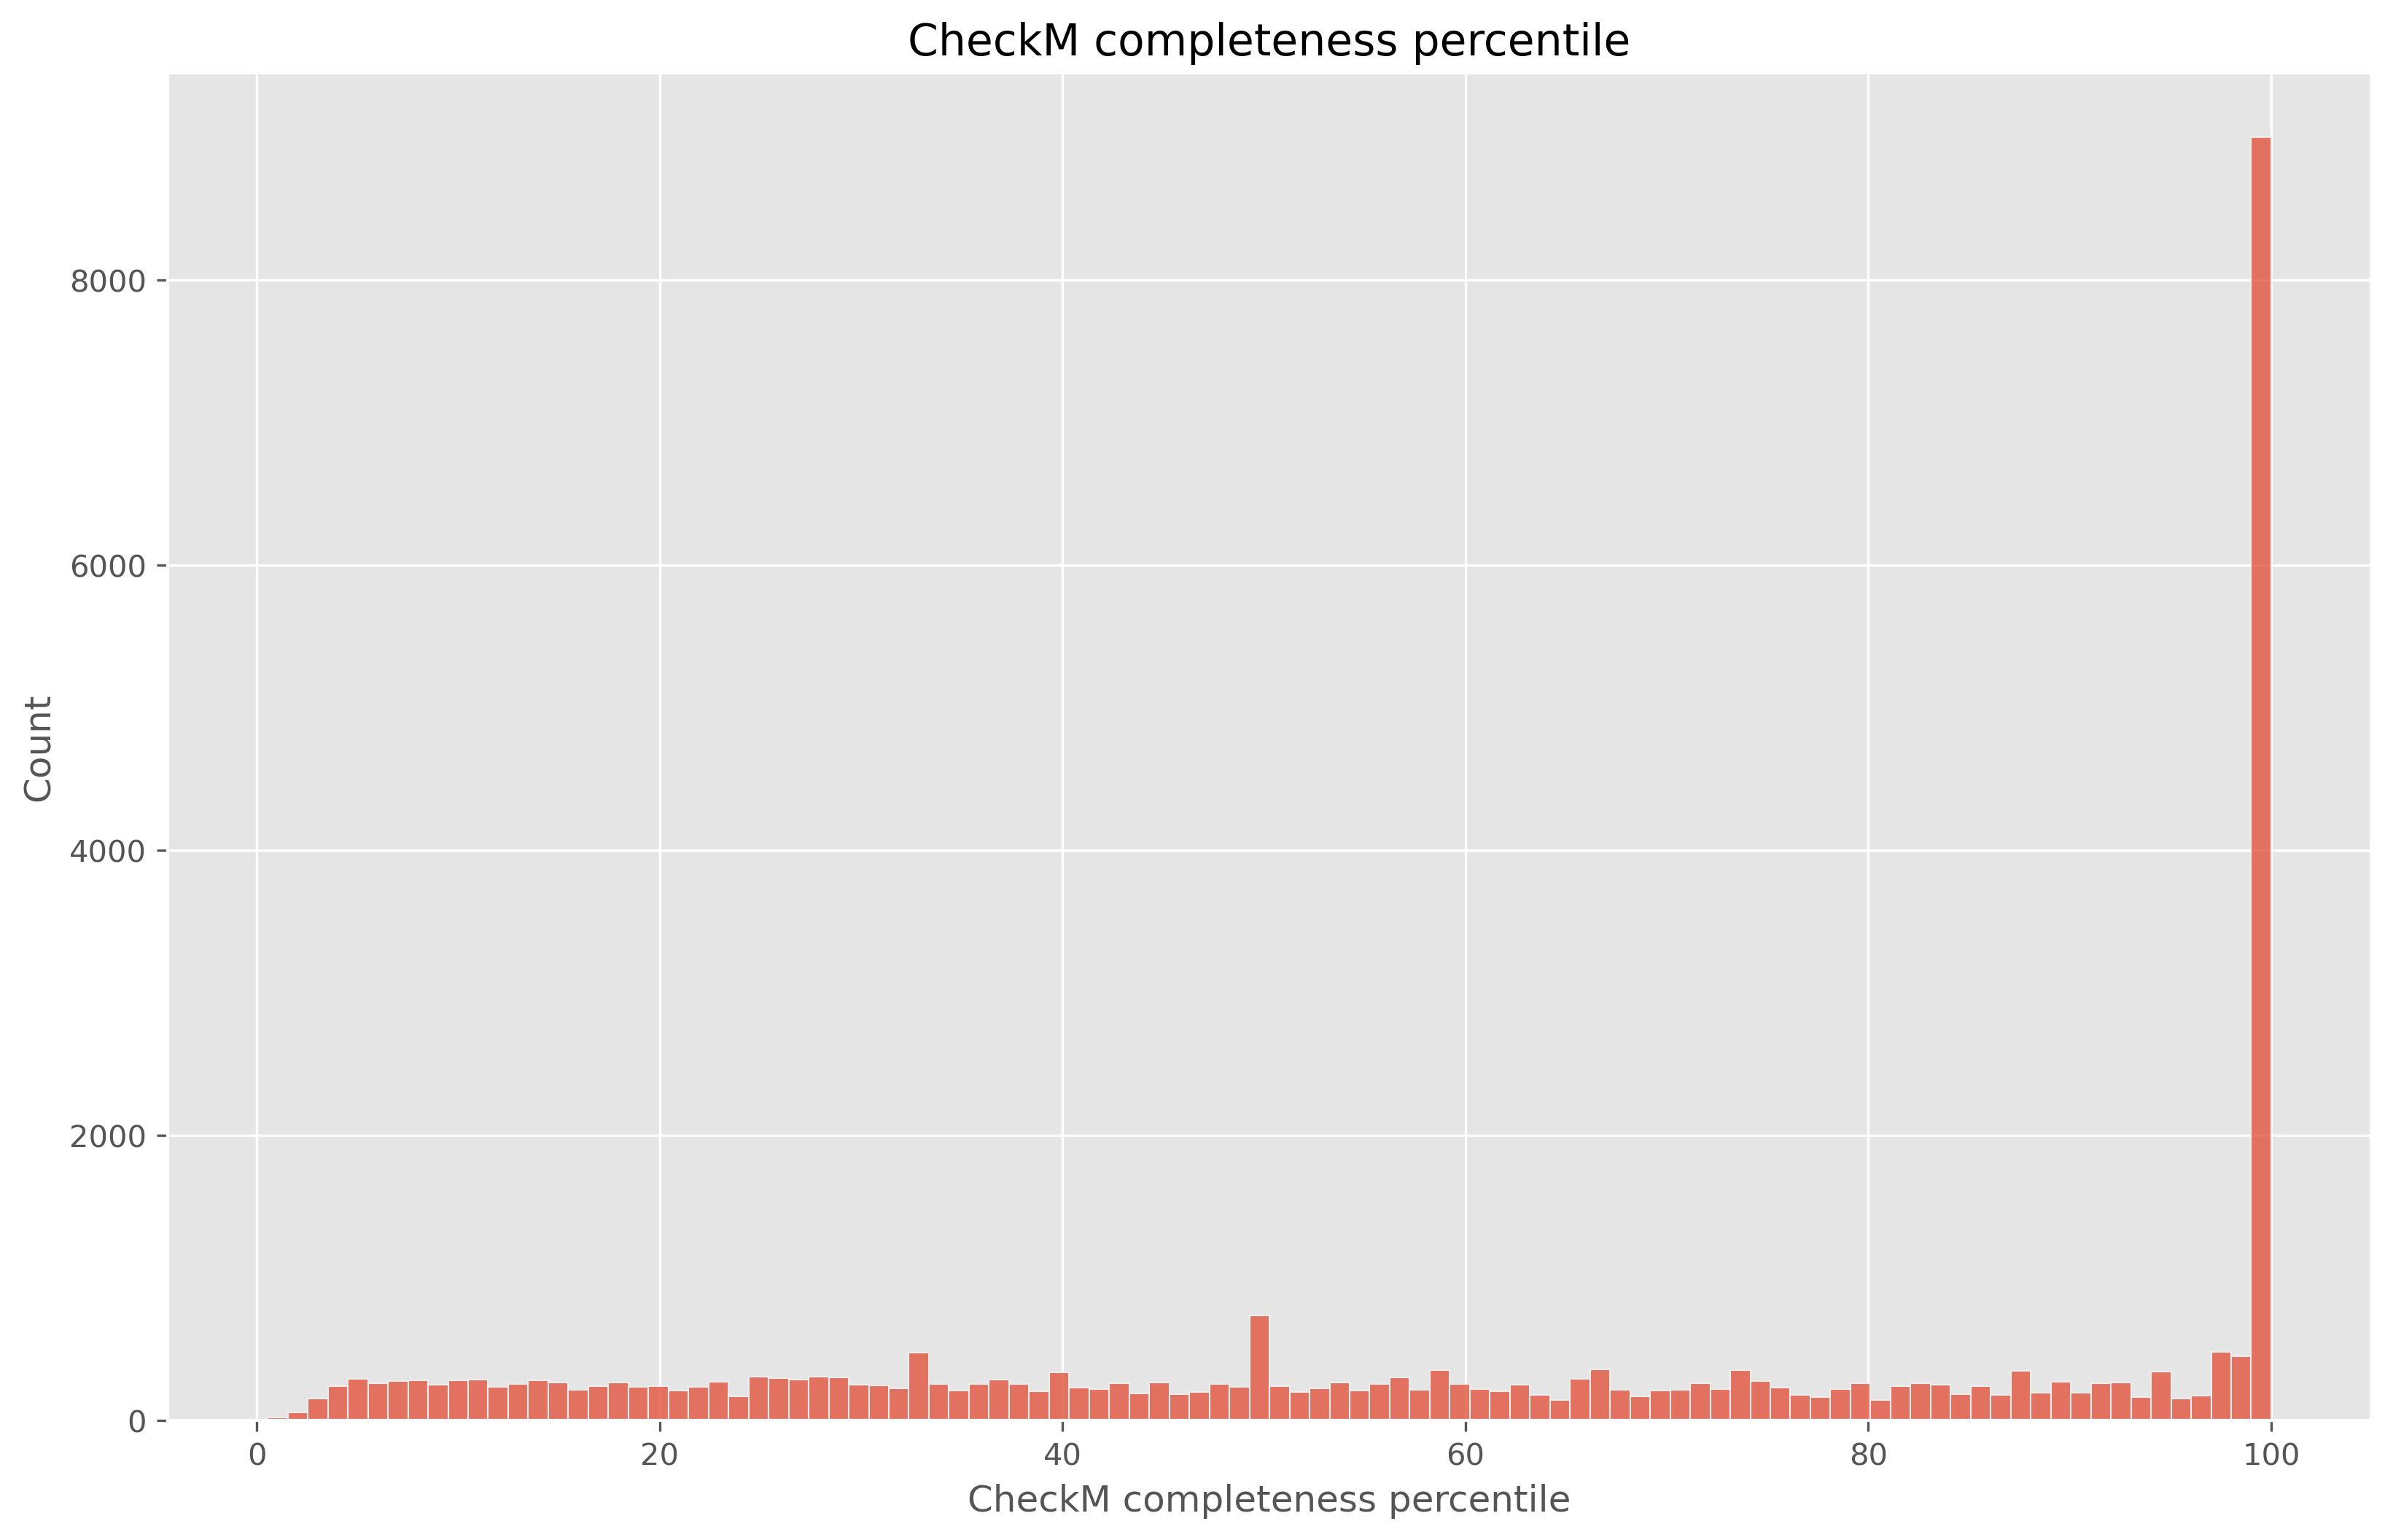

In [116]:
# plot the contamination, completeness, and completeness percentile
data = df#.query("`CheckM contamination` < 3 and `CheckM completeness percentile` > 75 and `CheckM completeness` > 95")
for col in checkm_cols:
    values = data[col].dropna().astype(float)
    fig, ax = plt.subplots(dpi=300)
    sns.histplot(values, ax=ax, bins=100)
    ax.set_title(col)


In [115]:
data

,Organism Name,Organism Taxonomic ID,Assembly BioProject Accession,Assembly BioSample Accession,Assembly Name,Organism Infraspecific Names Strain,Assembly BioSample Strain,Assembly Sequencing Tech,Assembly Stats Total Number of Chromosomes,Assembly Stats Total Sequence Length,Assembly Stats Genome Coverage,Assembly BioSample Project name,CheckM completeness,CheckM completeness percentile,CheckM contamination
Assembly Accession,,,,,,,,,,,,,,,
GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,ATCC 21022,ATCC 21022,ONT;Illumina,1,4434229,100.0,NaN,99.74,100.0,0.18
GCF_003595605.1,[Bacillus] caldolyticus,1394,PRJNA420054,SAMN08104862,ASM359560v1,NEB414,NEB414,PacBio,2,3485582,159.9,NaN,99.50,100.0,0.33
GCF_009684695.1,[Clostridium] scindens,29347,PRJNA561470,SAMN13152203,ASM968469v1,BL389WT3D,BL389WT3D,ONT,1,3785527,264.0,NaN,99.38,100.0,0.07
GCF_016889005.1,[Clostridium] scindens,29347,PRJNA231221,SAMN16357369,ASM1688900v1,FDAARGOS_1227,FDAARGOS_1227,PacBio;Illumina,1,3619096,1116.1,NaN,99.38,100.0,0.07
GCF_022845815.1,[Clostridium] scindens,29347,PRJDB11902,SAMD00389867,ASM2284581v1,CE91-St59,CE91-St59,PacBio;Illumina,1,3608085,190.0,Isolate bacteria and archaea from a Japanese c...,99.38,100.0,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_041950555.1,Zobellella sp. DQSA1,3342386,PRJNA1156831,SAMN43501998,ASM4195055v1,DQSA1,DQSA1,PacBio,1,4201419,197.7,NaN,99.05,100.0,2.81
GCF_029323795.1,Zobellia alginiliquefaciens,3032586,PRJNA941813,SAMN33610405,ASM2932379v1,LLG6346-3.1,LLG6346-3.1,ONT;Illumina,1,5066785,707.0,NaN,99.68,100.0,0.65
GCF_027594425.1,Zunongwangia sp. HGR-M22,3015168,PRJNA678113,SAMN32236153,ASM2759442v1,HGR-M22,HGR-M22,PacBio;Illumina,1,4040619,241.3,NaN,99.89,100.0,0.65


In [145]:
runs = pd.read_csv("../config/bacteria_lr_runs.tsv", sep="\t", index_col="Assembly Accession")

In [146]:
runs

,Organism Name,Organism Taxonomic ID,Assembly BioProject Accession,Assembly BioSample Accession,Assembly Name,Organism Infraspecific Names Strain,Assembly BioSample Strain,Assembly Sequencing Tech,Assembly Stats Total Number of Chromosomes,Assembly Stats Total Sequence Length,Assembly Stats Genome Coverage,Assembly BioSample Project name,Run Accession,Instrument Platform,CheckM completeness,CheckM contamination,CheckM completeness percentile
Assembly Accession,,,,,,,,,,,,,,,,,
GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,ATCC 21022,ATCC 21022,Illumina;ONT,1,4434229,100.0,NaN,SRR29457729,OXFORD_NANOPORE,99.74,0.18,100.000000
GCF_025149125.1,[Clostridium] asparagiforme DSM 15981,518636,PRJNA746600,SAMN20222674,ASM2514912v1,DSM 15981,DSM 15981,Illumina;ONT,1,6353279,100.0,NaN,SRR15171290,OXFORD_NANOPORE,98.44,5.07,77.777780
GCF_022845755.1,[Clostridium] hylemonae,89153,PRJDB11902,SAMD00389864,ASM2284575v1,CE91-St63,CE91-St63,Illumina;PacBio,1,3922038,218.0,Isolate bacteria and archaea from a Japanese c...,DRR307118,PACBIO_SMRT,99.38,NaN,100.000000
GCF_016889005.1,[Clostridium] scindens,29347,PRJNA231221,SAMN16357369,ASM1688900v1,FDAARGOS_1227,FDAARGOS_1227,Illumina;PacBio,1,3619096,1116.1,NaN,SRR13182350,PACBIO_SMRT,99.38,0.07,100.000000
GCF_022845815.1,[Clostridium] scindens,29347,PRJDB11902,SAMD00389867,ASM2284581v1,CE91-St59,CE91-St59,Illumina;PacBio,1,3608085,190.0,Isolate bacteria and archaea from a Japanese c...,DRR307121,PACBIO_SMRT,99.38,0.07,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_005937895.2,Yersinia sp. KBS0713,1179669,PRJNA539822,SAMN11620949,ASM593789v2,KBS0713,KBS0713,Illumina;ONT,1,4539645,20.0,NaN,SRR10064731,OXFORD_NANOPORE,99.91,1.08,100.000000
GCF_026183365.1,Yersinia sp. SCPM-O-B-9106 (C-191),2992843,PRJNA269675,SAMN31564381,ASM2618336v1,SCPM-O-B-9106 (C-191),SCPM-O-B-9106 (C-191),Other;ONT,1,4417639,172.5,NaN,SRR22225499,OXFORD_NANOPORE,99.73,0.18,100.000000
GCF_002158905.1,Yoonia vestfoldensis,245188,PRJNA380207,SAMN07142919,ASM215890v1,SMR4r,SMR4r,PacBio,3,3987360,177.9,NaN,SRR5614824,PACBIO_SMRT,95.47,22.61,33.333332


In [126]:
runs.groupby("Instrument Platform").size()

Instrument Platform
OXFORD_NANOPORE    7611
PACBIO_SMRT        6894
dtype: int64

In [127]:
runs_filt = runs.query("`CheckM contamination` < 3 and `CheckM completeness percentile` > 75 and `CheckM completeness` > 95")

In [128]:
runs_filt.groupby("Instrument Platform").size()

Instrument Platform
OXFORD_NANOPORE    2593
PACBIO_SMRT        2219
dtype: int64

In [148]:
runs_filt.to_csv("../config/bacteria_lr_runs.filtered.tsv", sep="\t")

In [158]:
row.to_csv(sep="\t", header=False)

'Organism Name\t[Actinomadura] parvosata subsp. kistnae\nOrganism Taxonomic ID\t1909395\nAssembly BioProject Accession\tPRJNA348567\nAssembly BioSample Accession\tSAMN05912833\nAssembly Name\tASM205745v1\nOrganism Infraspecific Names Strain\tATCC 55076\nAssembly BioSample Strain \tATCC 55076\nAssembly Sequencing Tech\tPacBio\nAssembly Stats Total Number of Chromosomes\t1\nAssembly Stats Total Sequence Length\t13047416\nAssembly Stats Genome Coverage\t110.0\nAssembly BioSample Project name  \t\n'

In [163]:
row.to_list()

['[Actinomadura] parvosata subsp. kistnae',
 np.int64(1909395),
 'PRJNA348567',
 'SAMN05912833',
 'ASM205745v1',
 'ATCC 55076',
 'ATCC 55076',
 'PacBio',
 np.int64(1),
 np.int64(13047416),
 np.float64(110.0),
 nan]

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Checking the ava and 2set approaches on some test data

In [32]:
df = pd.read_csv("../results/estimates/estimates.tsv", sep="\t")
df["abs_relative_error"] = df["relative_error"].abs()
df

,asm_accession,organism,taxid,bioproject,biosample,strain,asm_seq_tech,n_chromosomes,true_size,asm_coverage,platform,run,estimate,method,relative_size,relative_error,cpu_time,memory_mb,abs_relative_error
0,GCF_038024985.1,Staphylococcus aureus,1280,PRJNA1090044,SAMN40554552,TUM22723,ONT,2,2838054,303.0,OXFORD_NANOPORE,SRR29675662,3846566.0,lrge-ava,1.355353,35.535335,929.37,2559.03,35.535335
1,GCF_026729635.1,Klebsiella aerogenes,548,PRJNA812595,SAMN32093418,2022CK-00751,Illumina;ONT,1,5133168,100.0,OXFORD_NANOPORE,SRR29882850,3856092.0,lrge-ava,0.751211,-24.878905,979.32,2544.31,24.878905
2,GCF_037975155.1,Paenibacillus sp. FSL R5-0486,2921645,PRJNA768416,SAMN26232448,NaN,Illumina;ONT,1,7235595,246.0,OXFORD_NANOPORE,SRR19357518,3906302.0,lrge-ava,0.539873,-46.012705,927.06,2559.30,46.012705
3,GCF_009730535.1,Streptococcus gordonii,1302,PRJNA231221,SAMN11056398,FDAARGOS_683,Illumina;PacBio,1,2196595,2138.2,PACBIO_SMRT,SRR9163116,3868735.0,lrge-ava,1.761242,76.124183,750.13,1679.29,76.124183
4,GCF_037975445.1,Peribacillus sp. FSL P2-0133,2921573,PRJNA768416,SAMN26232376,NaN,Illumina;ONT,1,5810370,286.3,OXFORD_NANOPORE,SRR21415572,3851639.0,lrge-ava,0.662890,-33.710951,924.83,2555.05,33.710951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,GCF_040739205.1,Staphylococcus capitis subsp. urealyticus,74703,PRJNA1032276,SAMN38029076,Sc1191106,ONT,3,2629560,70.0,OXFORD_NANOPORE,SRR27561249,4057960.0,genomescope,1.543209,54.320875,135.91,11486.86,54.320875
796,GCF_008329925.1,Sphaerotilus sulfidivorans,639200,PRJNA520894,SAMN10871119,D-507,PacBio,4,4430992,179.7,PACBIO_SMRT,SRR8539624,4057960.0,genomescope,0.915813,-8.418702,130.90,11487.77,8.418702
797,GCF_017474015.1,Pantoea ananatis,553,PRJNA642846,SAMN15405802,OC5a,PacBio,4,4980968,118.0,PACBIO_SMRT,SRR12158098,4057960.0,genomescope,0.814693,-18.530695,136.64,11485.81,18.530695
798,GCF_013394125.1,Pseudoalteromonas sp. Scap25,2589992,PRJNA549111,SAMN12071514,Scap25,ONT,2,4131315,200.0,OXFORD_NANOPORE,SRR16109998,4057960.0,genomescope,0.982244,-1.775585,134.87,11486.39,1.775585


[Text(0, -100, '-100'),
 Text(0, -10, '-10'),
 Text(0, -1, '-1'),
 Text(0, 0, '0'),
 Text(0, 1, '1'),
 Text(0, 10, '10'),
 Text(0, 100, '100'),
 Text(0, 1000, '1000')]

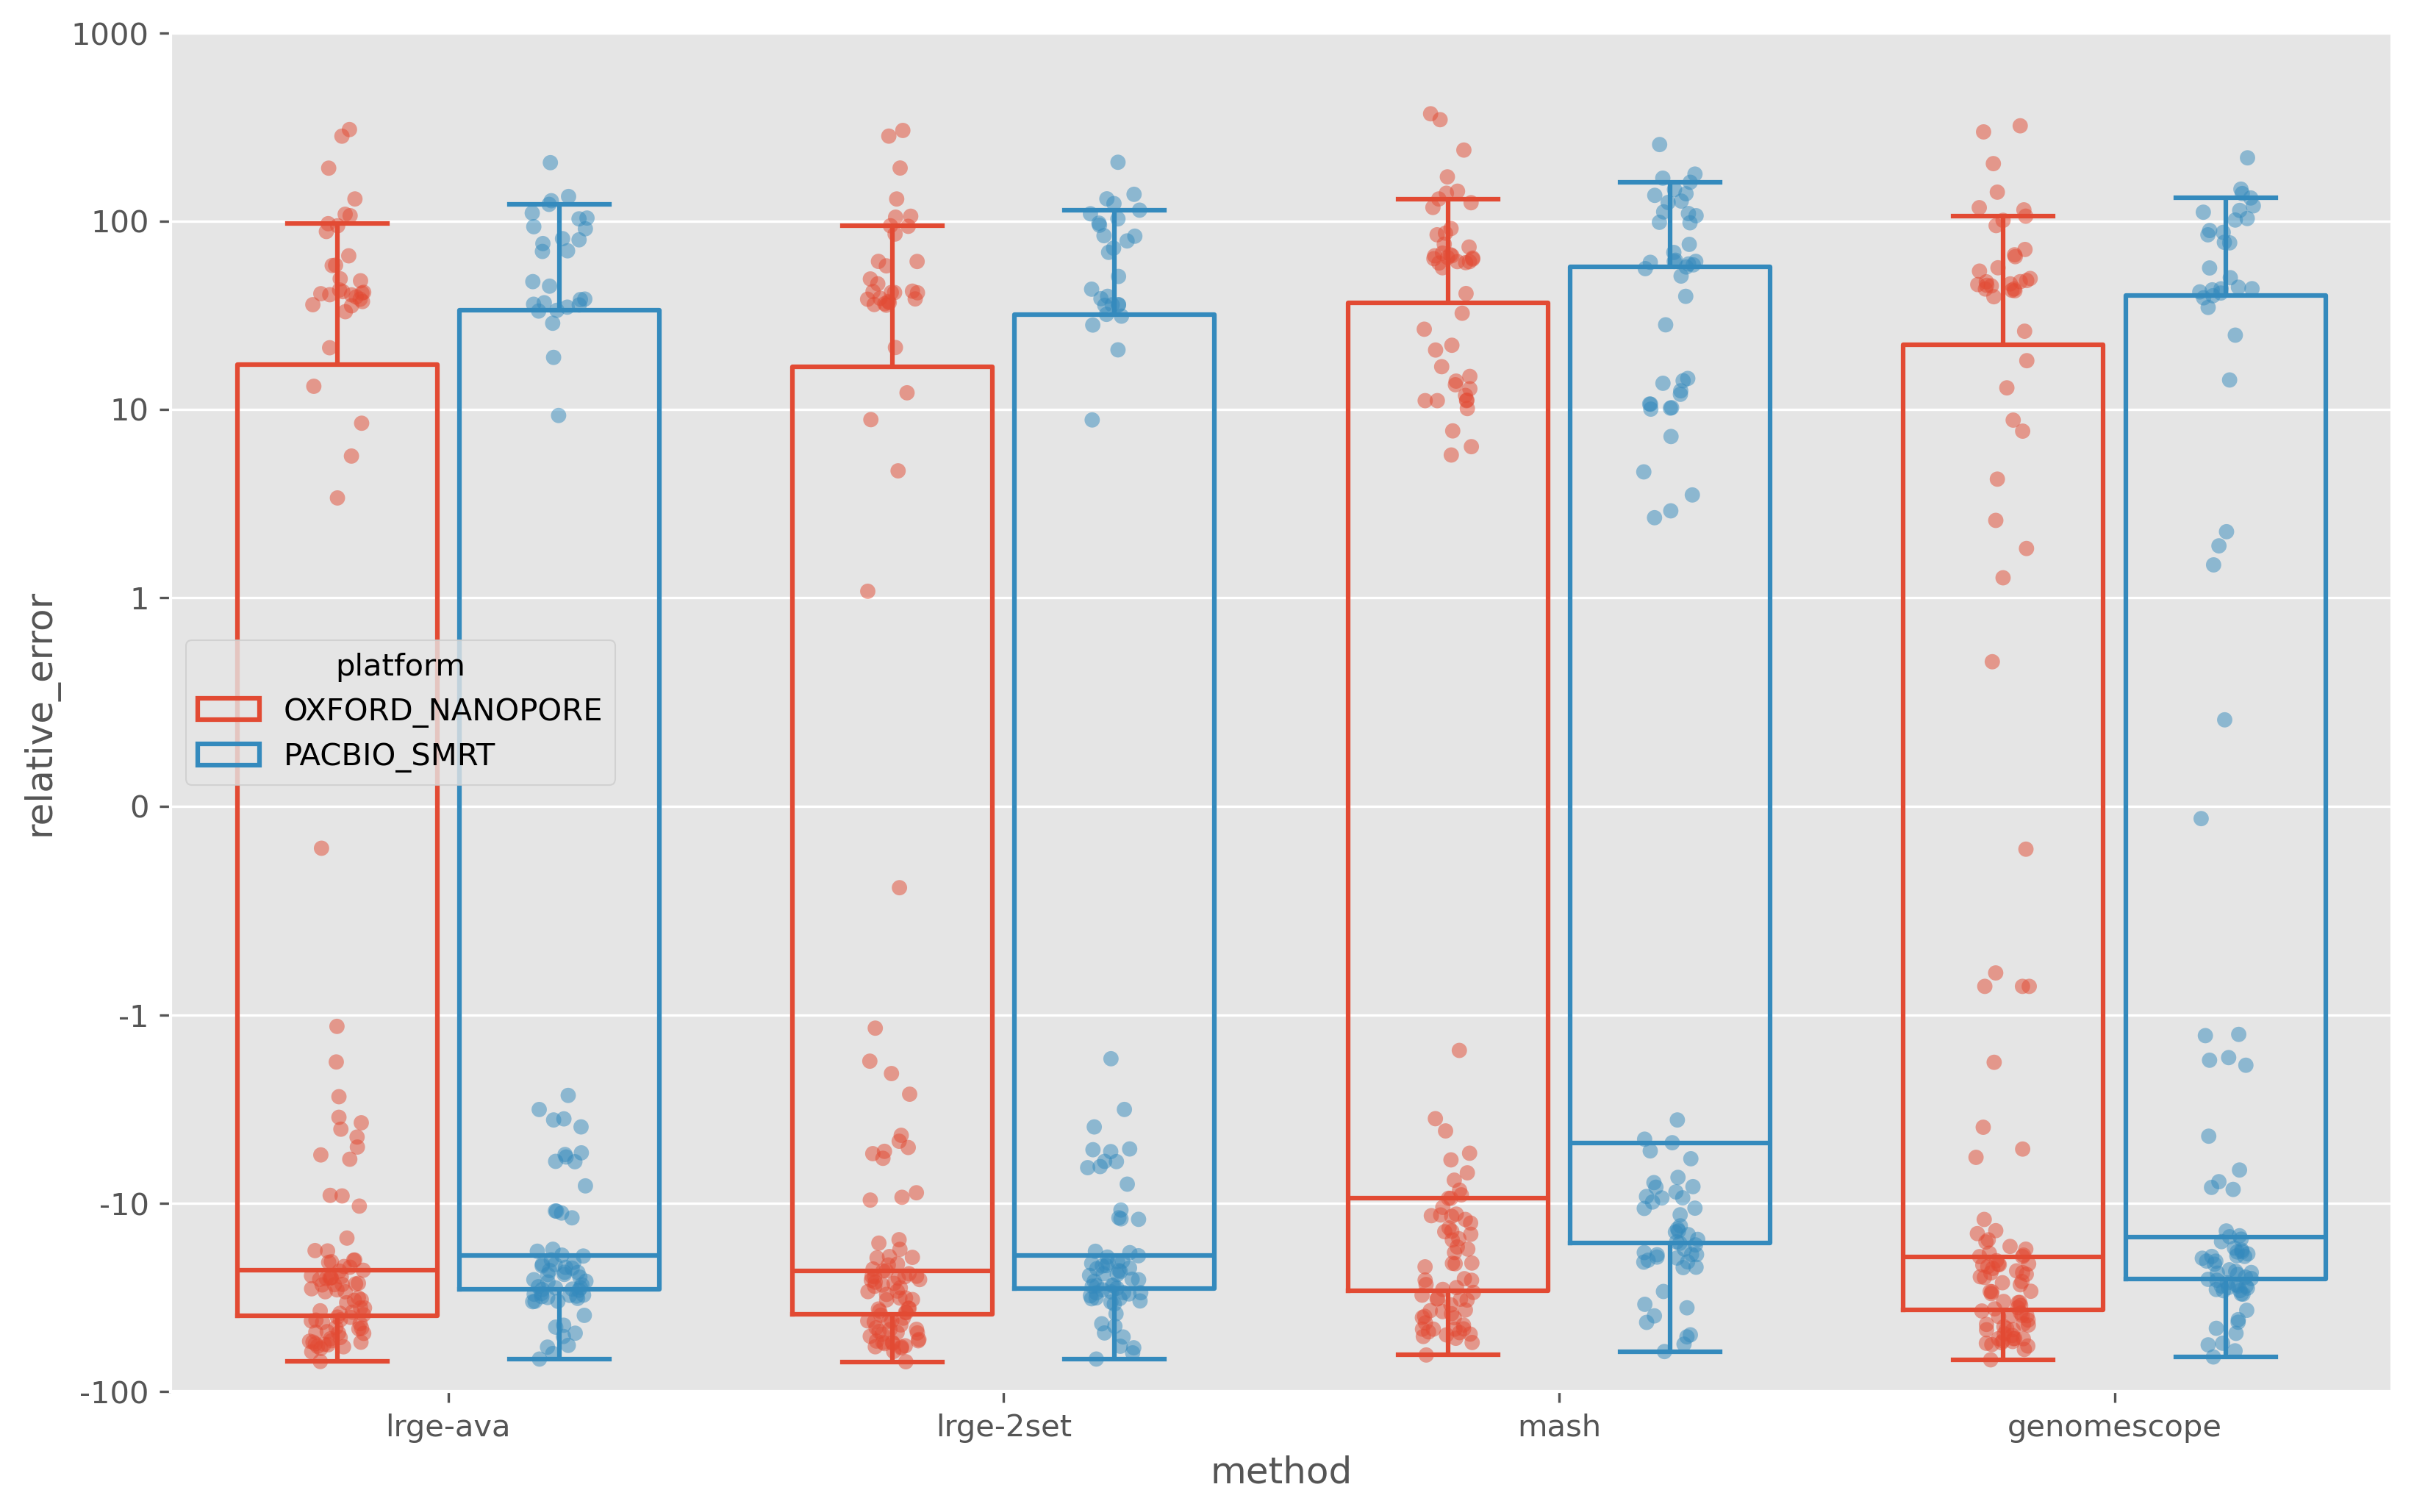

In [58]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "relative_error"
hue = "platform"
data = df
sns.boxplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, fliersize=0, gap=0.1)
sns.stripplot(x=x, y=y, hue=hue, data=data, ax=ax, dodge=True, alpha=0.5, legend=False)
ax.set_yscale("symlog", linthresh=1)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

[Text(0, -100, '-100'),
 Text(0, -10, '-10'),
 Text(0, -1, '-1'),
 Text(0, 0, '0'),
 Text(0, 1, '1'),
 Text(0, 10, '10'),
 Text(0, 100, '100'),
 Text(0, 1000, '1000')]

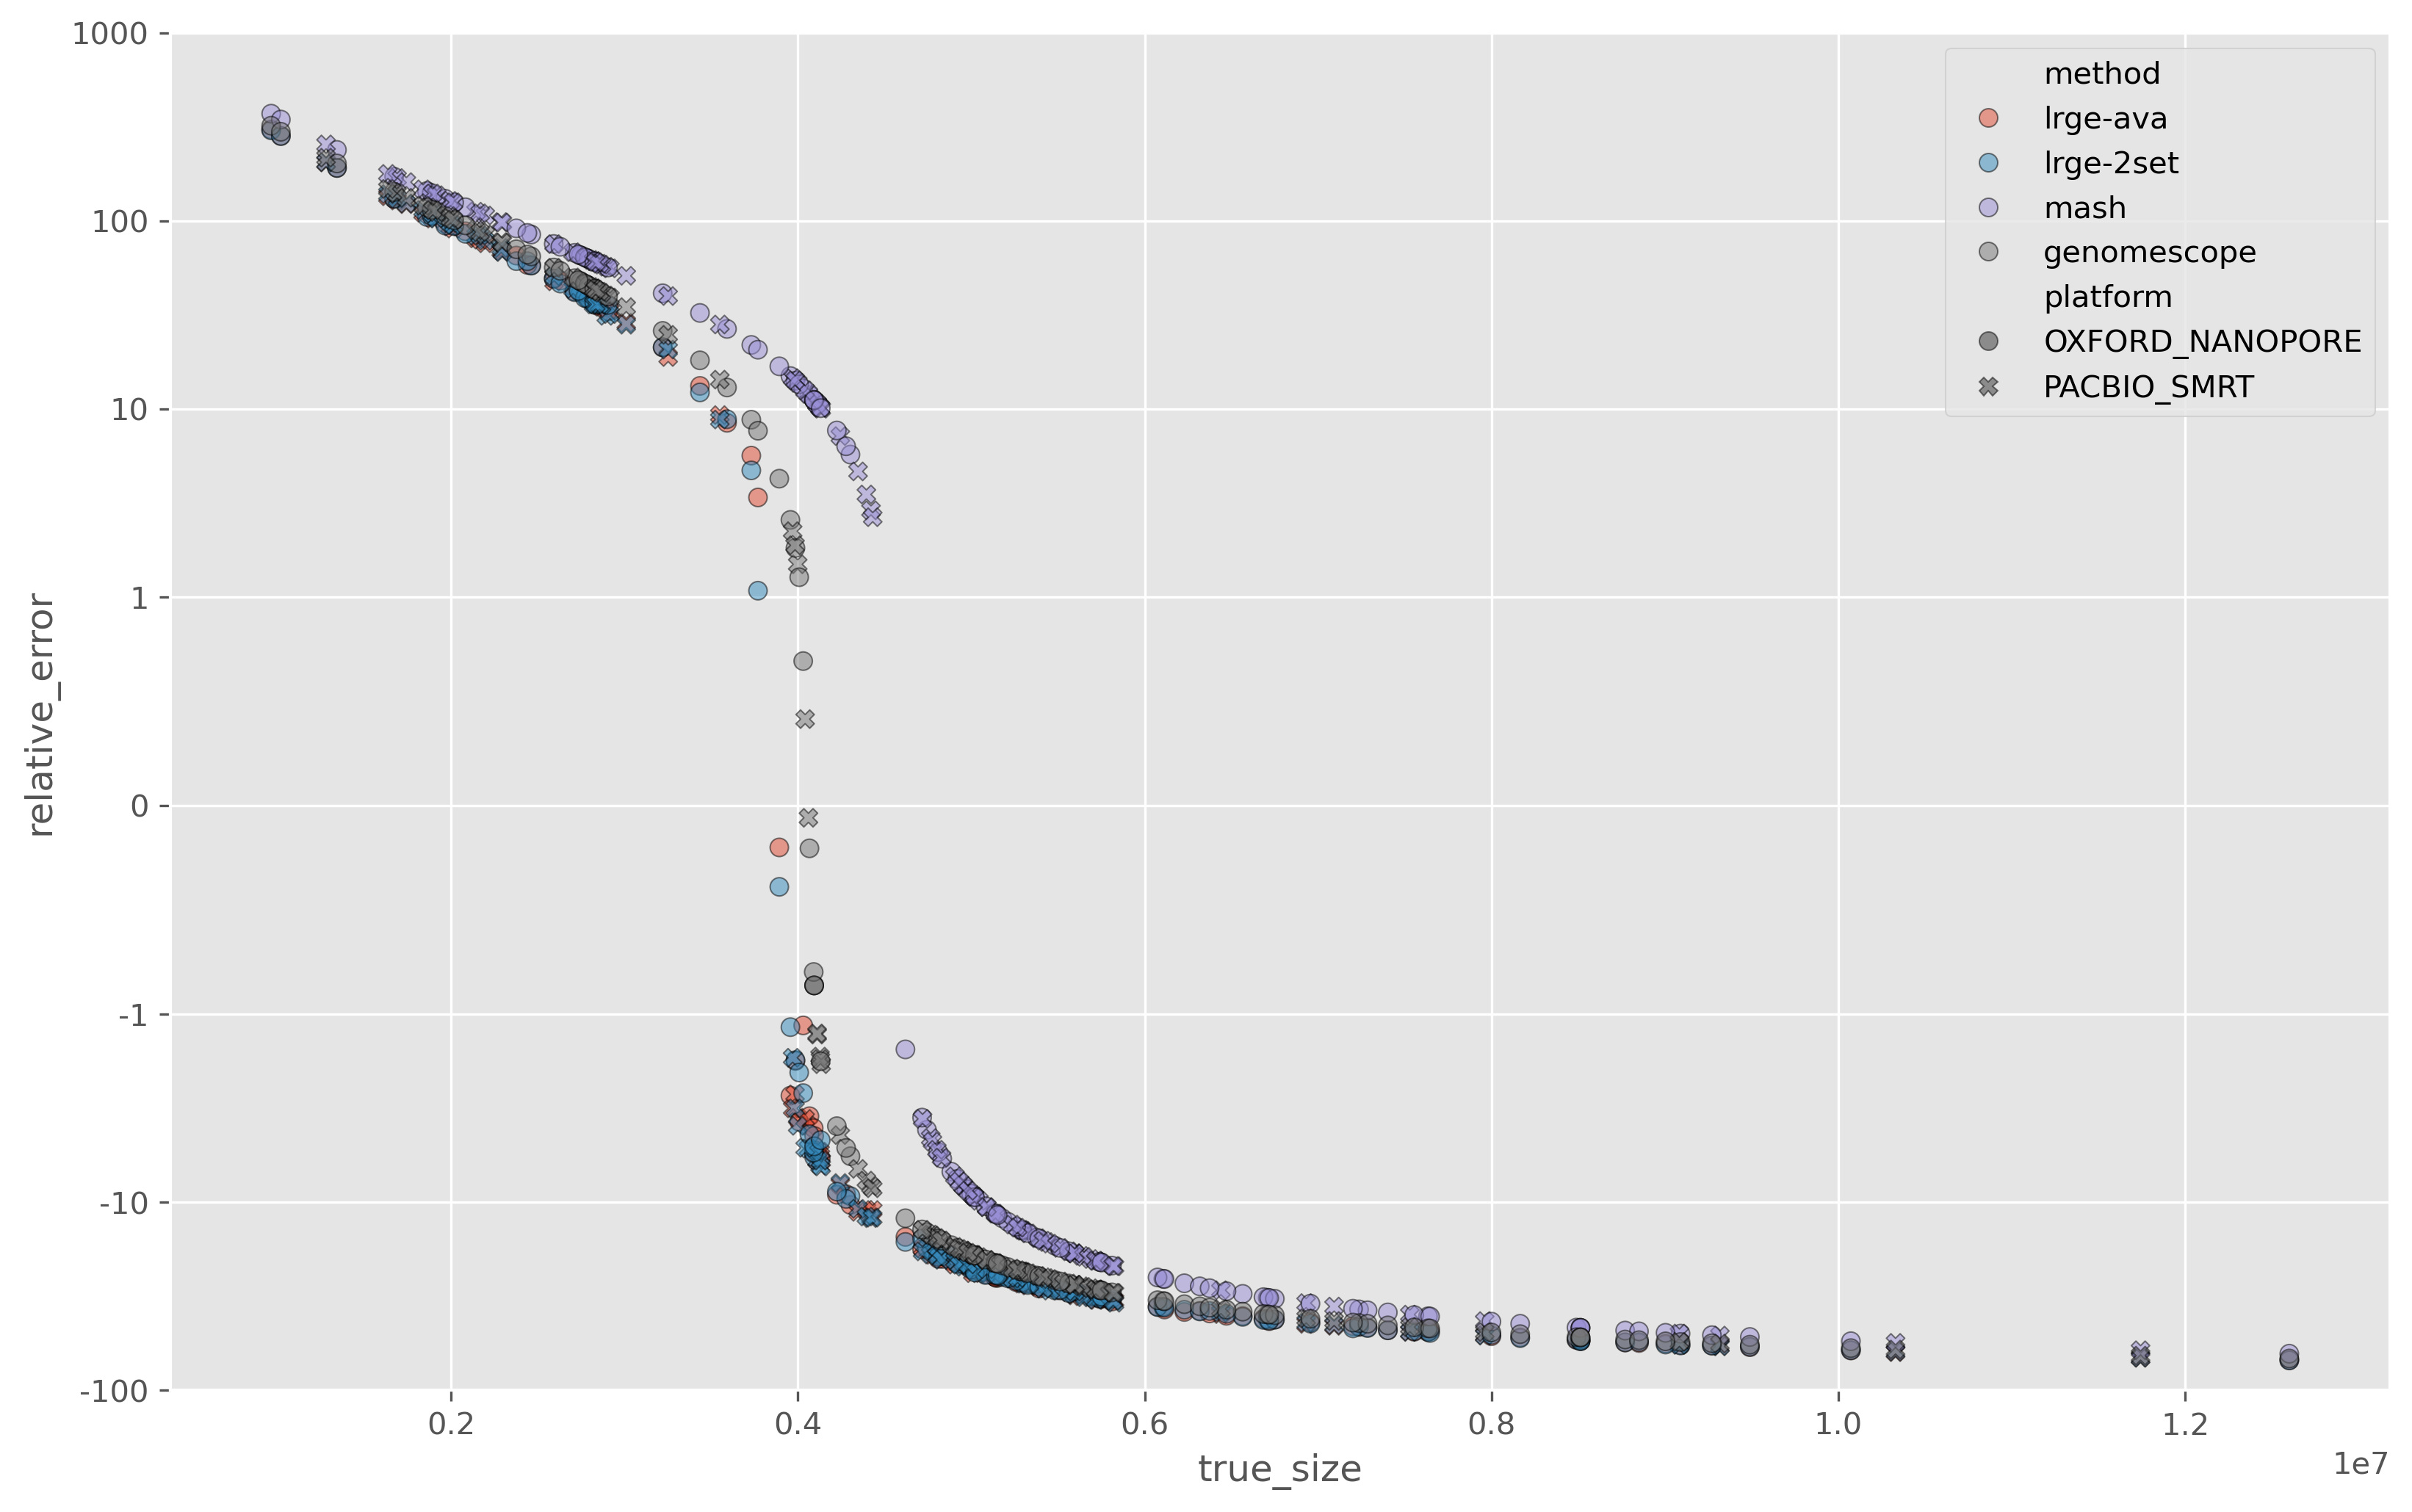

In [59]:
x = "true_size"
y = "relative_error"
style = "platform"
hue = "method"
data = df
fig, ax = plt.subplots(dpi=300)
sns.scatterplot(x=x, y=y, hue=hue, style=style, data=data, ax=ax, edgecolor="black", alpha=0.5)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000]
ax.set_yscale("symlog", linthresh=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

[Text(0, 0.01, '0.01'),
 Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000')]

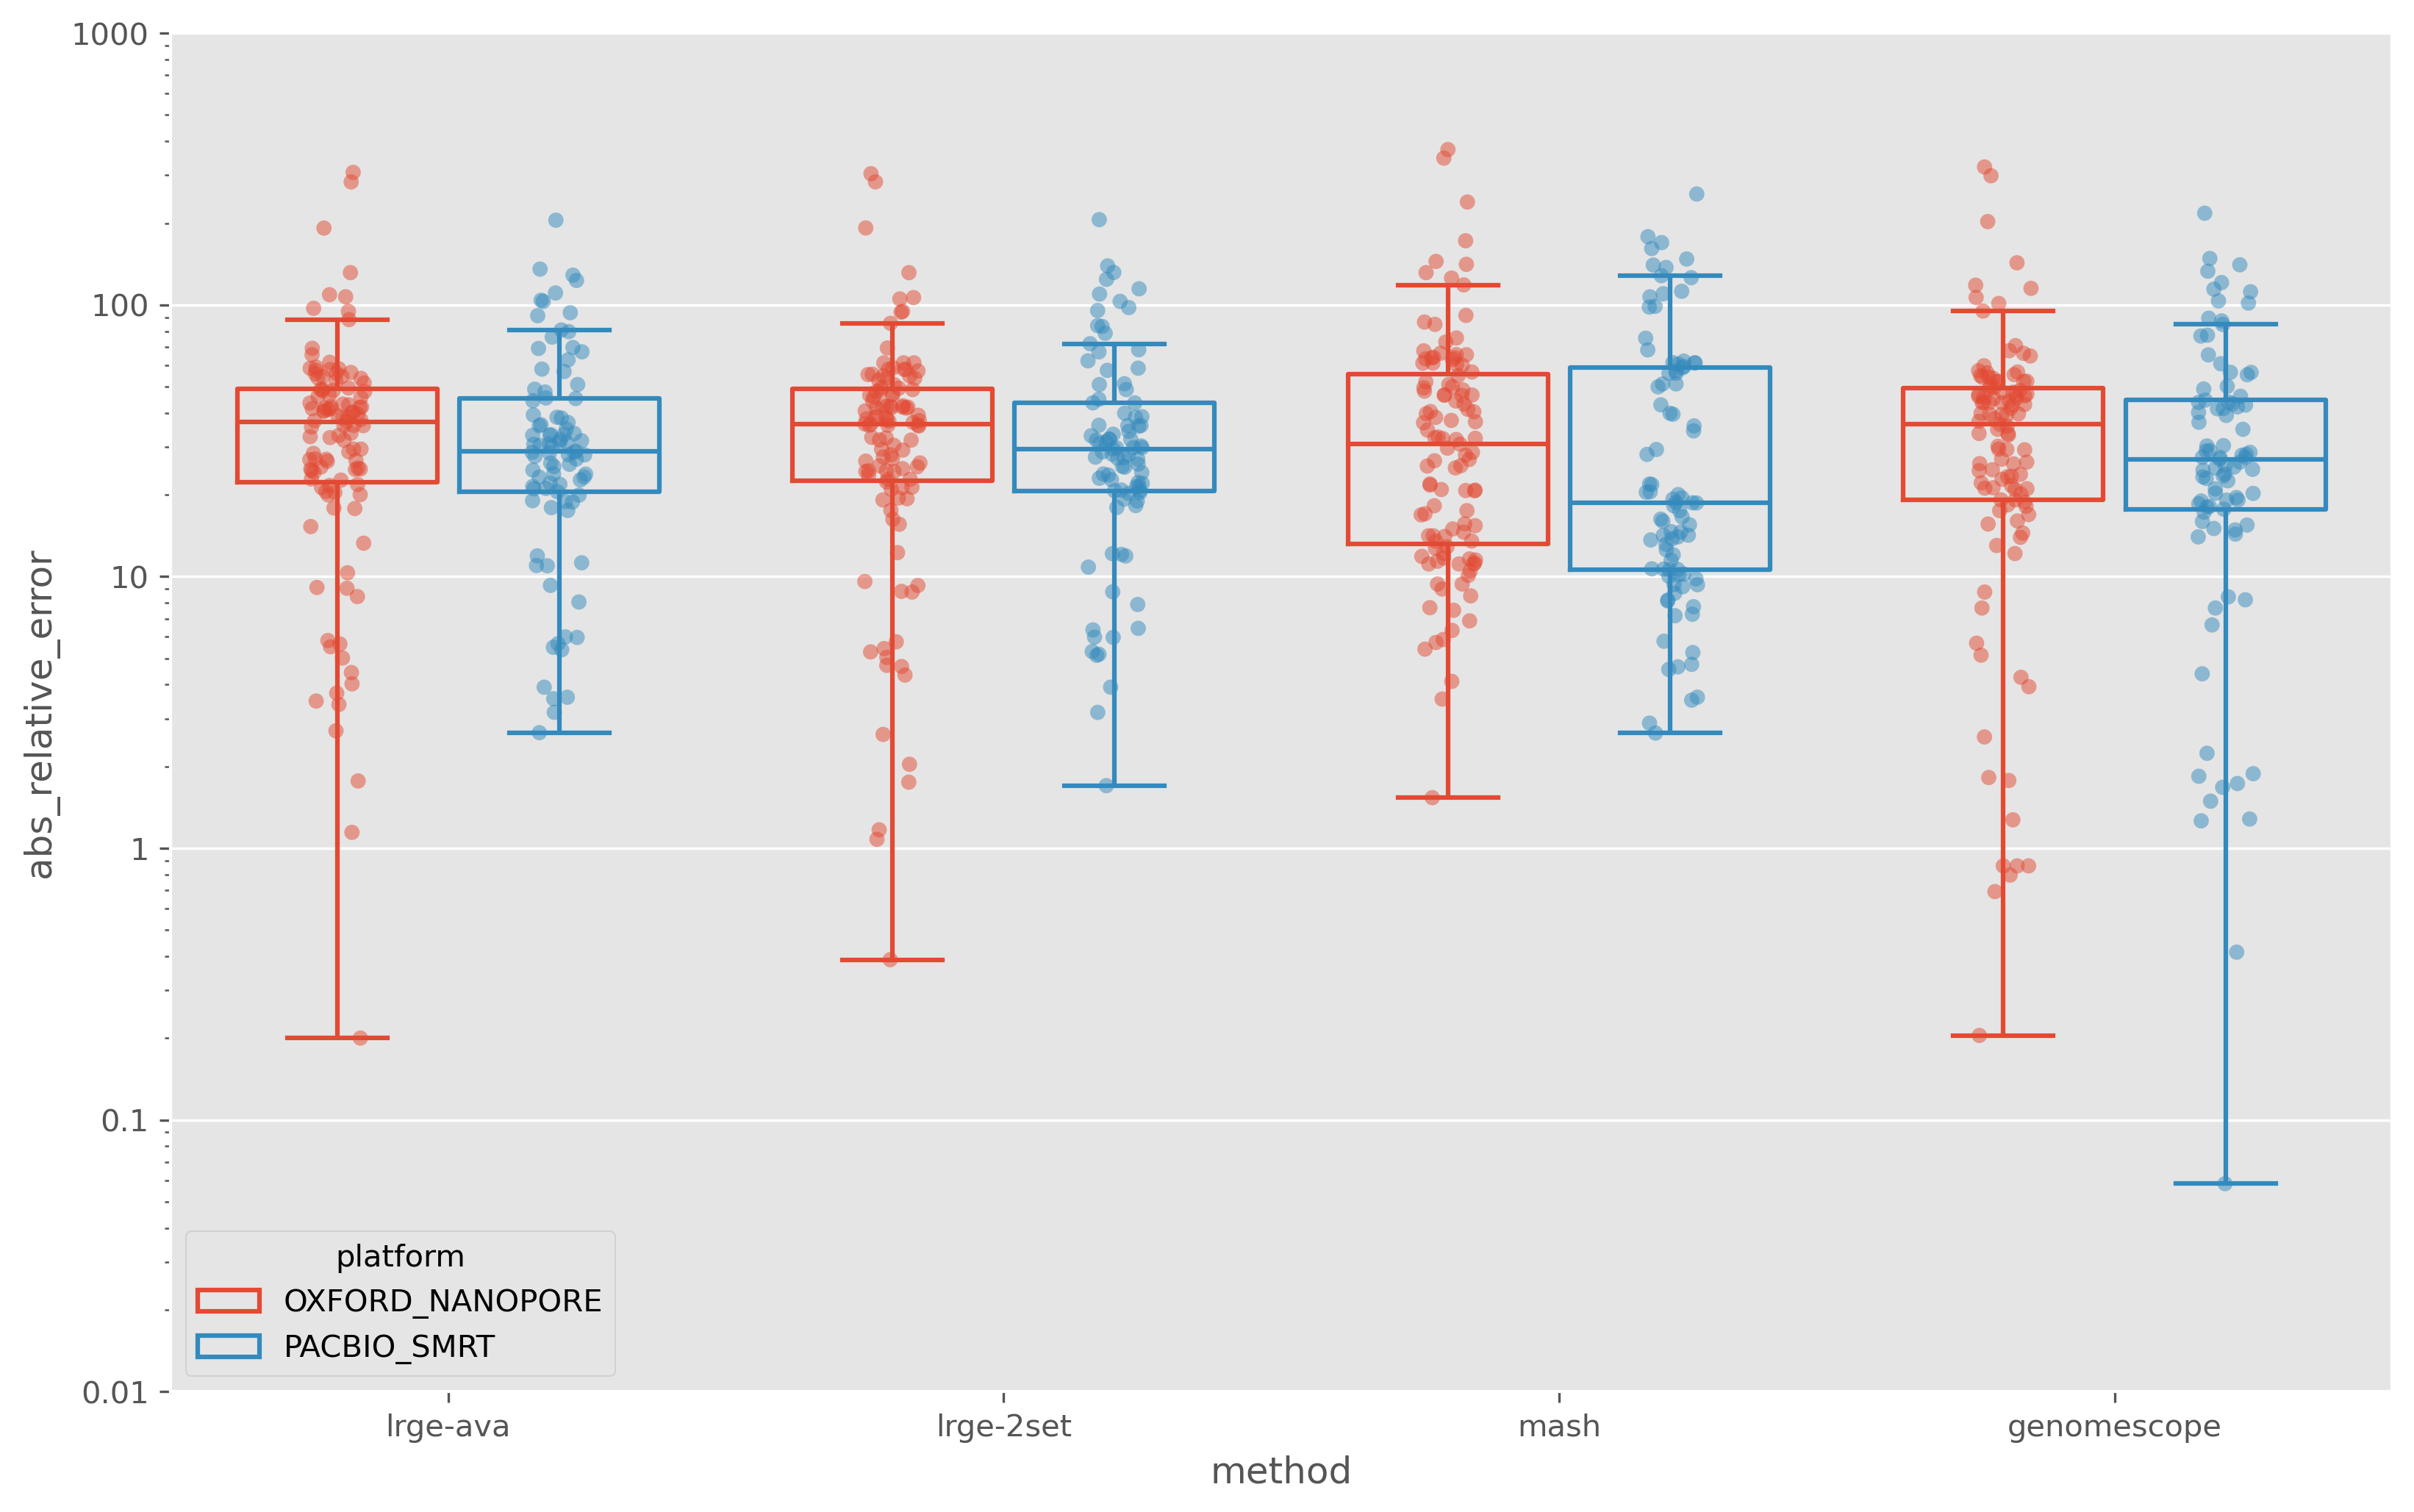

In [74]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "abs_relative_error"
hue = "platform"
data = df
sns.boxplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, fliersize=0, gap=0.1)
sns.stripplot(x=x, y=y, hue=hue, data=data, ax=ax, dodge=True, alpha=0.5, legend=False)
ax.set_yscale("log")
yticks = [0.01, 0.1, 1, 10, 100, 1000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

In [39]:
df.groupby(["method", "platform"])["abs_relative_error"].describe()

count       mean        std       min        25%  \
method      platform                                                            
genomescope OXFORD_NANOPORE  111.0  42.765470  47.392257  0.204536  19.160238   
            PACBIO_SMRT       89.0  39.190741  38.747132  0.058247  17.695483   
lrge-2set   OXFORD_NANOPORE  111.0  42.404278  43.992694  0.388855  22.546873   
            PACBIO_SMRT       89.0  39.348860  35.310148  1.699412  20.703369   
lrge-ava    OXFORD_NANOPORE  111.0  42.687016  44.228096  0.200064  22.225234   
            PACBIO_SMRT       89.0  38.927481  34.534181  2.662933  20.520114   
mash        OXFORD_NANOPORE  111.0  45.460502  57.093262  1.534983  13.175770   
            PACBIO_SMRT       89.0  42.162993  49.261492  2.654665  10.588932   

                                   50%        75%         max  
method      platform                                           
genomescope OXFORD_NANOPORE  36.331634  49.457513  321.868779  
            PACBIO_SMRT      27.053733  44.599470  217.474822  
lrge-2set   OXFORD_NANOPORE  36.439510  49.065319  304.028170  
            PACBIO_SMRT      29.523242  43.594713  205.973190  
lrge-ava    OXFORD_NANOPORE  37.188518  48.935613  307.394628  
            PACBIO_SMRT      28.912312  45.202394  204.967536  
mash        OXFORD_NANOPORE  30.708306  55.721222  372.878186  
            PACBIO_SMRT      18.689296  58.655283  255.861646

In [40]:
import scipy.stats as stats

((array([-3.13269090e+00, -2.86240960e+00, -2.71124085e+00, -2.60445496e+00,
         -2.52103830e+00, -2.45216961e+00, -2.39327695e+00, -2.34167369e+00,
         -2.29564214e+00, -2.25401521e+00, -2.21596250e+00, -2.18087139e+00,
         -2.14827658e+00, -2.11781604e+00, -2.08920237e+00, -2.06220345e+00,
         -2.03662904e+00, -2.01232119e+00, -1.98914727e+00, -1.96699480e+00,
         -1.94576754e+00, -1.92538245e+00, -1.90576741e+00, -1.88685932e+00,
         -1.86860270e+00, -1.85094845e+00, -1.83385292e+00, -1.81727714e+00,
         -1.80118612e+00, -1.78554840e+00, -1.77033549e+00, -1.75552160e+00,
         -1.74108324e+00, -1.72699897e+00, -1.71324918e+00, -1.69981586e+00,
         -1.68668245e+00, -1.67383370e+00, -1.66125548e+00, -1.64893473e+00,
         -1.63685932e+00, -1.62501798e+00, -1.61340021e+00, -1.60199621e+00,
         -1.59079683e+00, -1.57979349e+00, -1.56897816e+00, -1.55834331e+00,
         -1.54788184e+00, -1.53758709e+00, -1.52745276e+00, -1.51747292e+00,

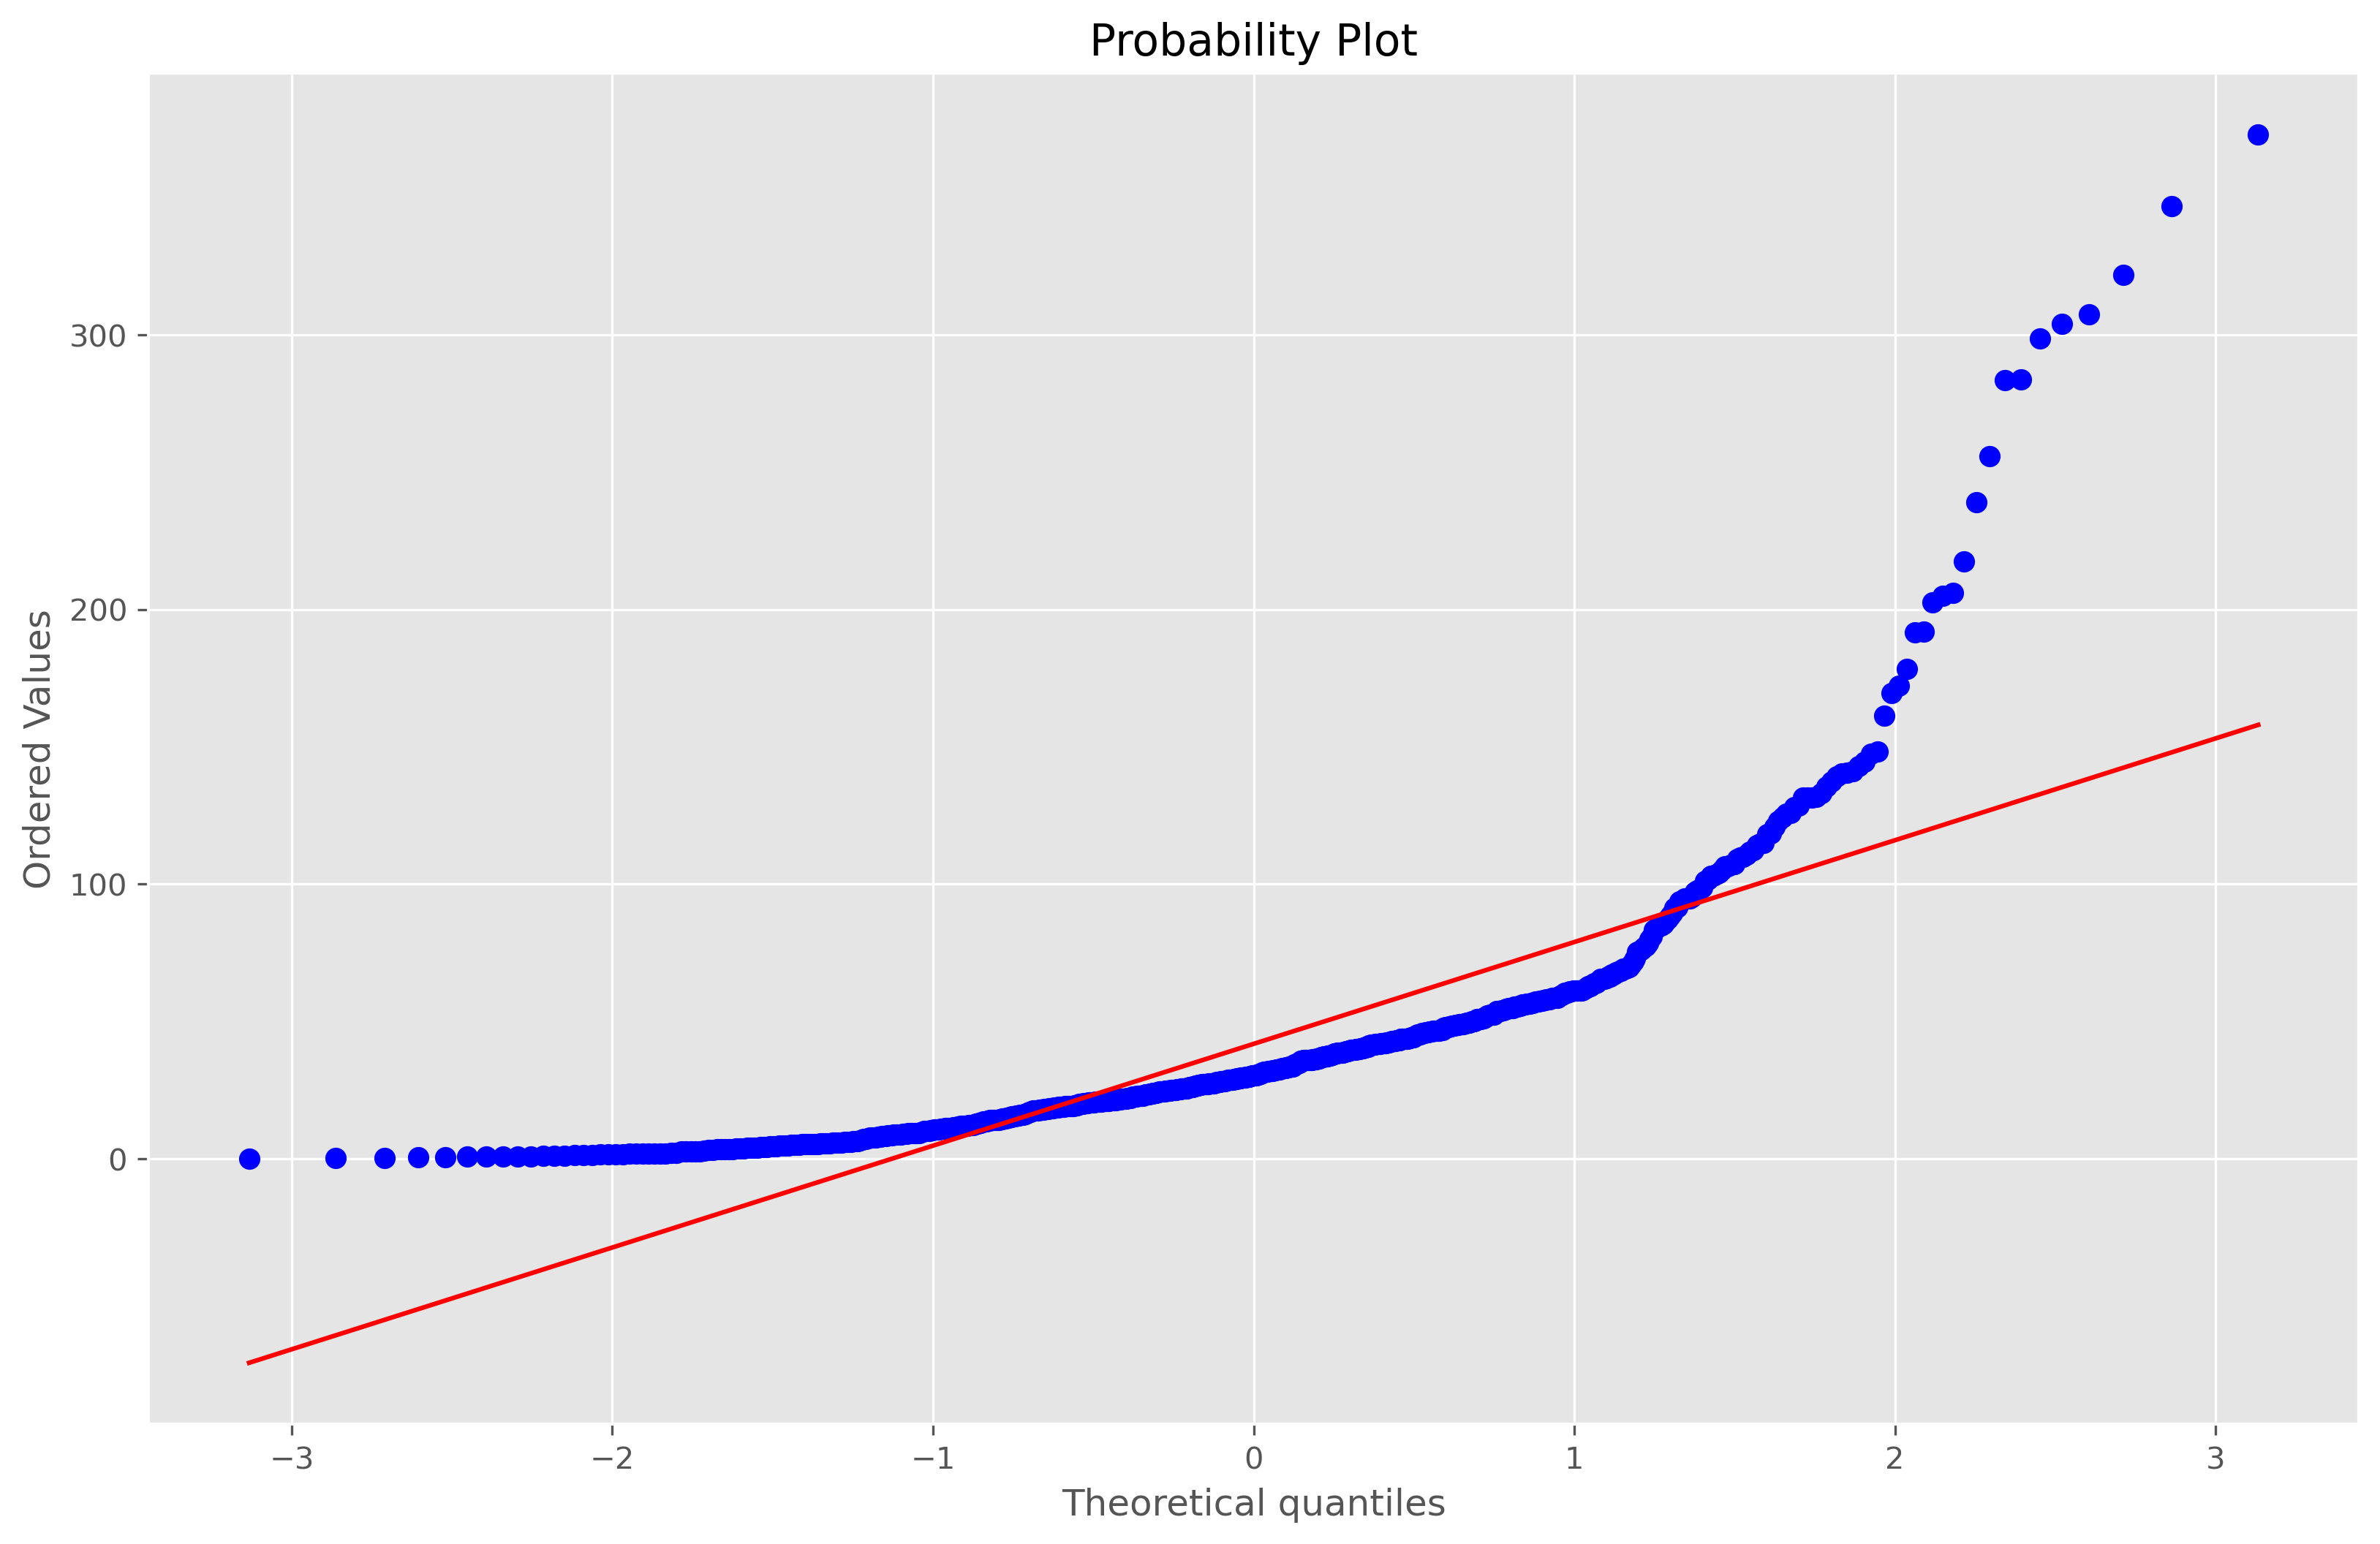

In [42]:
fig, ax = plt.subplots(dpi=300)
stats.probplot(df["abs_relative_error"], dist="norm", plot=ax)

In [47]:
from scipy.stats import shapiro, kruskal

In [46]:
# Shapiro-Wilk Test
stat, p_value = shapiro(df["abs_relative_error"])
print(f'Shapiro-Wilk test: p-value = {p_value}')
if p_value < 0.05:
    print("The data is not normally distributed")
else:
    print("The data is normally distributed")

Shapiro-Wilk test: p-value = 4.773048090441103e-36
The data is not normally distributed


In [57]:
grouped = df.query("platform == 'PACBIO_SMRT'").groupby("method")["abs_relative_error"].apply(list)
stat, p_value = kruskal(*grouped)
# Output the test statistic and p-value
print(f"Kruskal-Wallis test statistic = {stat:.4f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the groups for PacBio.")
else:
    print("There is no significant difference between the groups.")

Kruskal-Wallis test statistic = 3.7771, p-value = 0.2866
There is no significant difference between the groups.


In [67]:
grouped = df.query("platform == 'OXFORD_NANOPORE'").groupby("method")["abs_relative_error"].apply(list)
stat, p_value = kruskal(*grouped)
# Output the test statistic and p-value
print(f"Kruskal-Wallis test statistic = {stat:.4f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the groups for ONT.")
else:
    print("There is no significant difference between the groups.")

Kruskal-Wallis test statistic = 0.5141, p-value = 0.9158
There is no significant difference between the groups.


In [60]:
df

,asm_accession,organism,taxid,bioproject,biosample,strain,asm_seq_tech,n_chromosomes,true_size,asm_coverage,platform,run,estimate,method,relative_size,relative_error,cpu_time,memory_mb,abs_relative_error
0,GCF_038024985.1,Staphylococcus aureus,1280,PRJNA1090044,SAMN40554552,TUM22723,ONT,2,2838054,303.0,OXFORD_NANOPORE,SRR29675662,3846566.0,lrge-ava,1.355353,35.535335,929.37,2559.03,35.535335
1,GCF_026729635.1,Klebsiella aerogenes,548,PRJNA812595,SAMN32093418,2022CK-00751,Illumina;ONT,1,5133168,100.0,OXFORD_NANOPORE,SRR29882850,3856092.0,lrge-ava,0.751211,-24.878905,979.32,2544.31,24.878905
2,GCF_037975155.1,Paenibacillus sp. FSL R5-0486,2921645,PRJNA768416,SAMN26232448,NaN,Illumina;ONT,1,7235595,246.0,OXFORD_NANOPORE,SRR19357518,3906302.0,lrge-ava,0.539873,-46.012705,927.06,2559.30,46.012705
3,GCF_009730535.1,Streptococcus gordonii,1302,PRJNA231221,SAMN11056398,FDAARGOS_683,Illumina;PacBio,1,2196595,2138.2,PACBIO_SMRT,SRR9163116,3868735.0,lrge-ava,1.761242,76.124183,750.13,1679.29,76.124183
4,GCF_037975445.1,Peribacillus sp. FSL P2-0133,2921573,PRJNA768416,SAMN26232376,NaN,Illumina;ONT,1,5810370,286.3,OXFORD_NANOPORE,SRR21415572,3851639.0,lrge-ava,0.662890,-33.710951,924.83,2555.05,33.710951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,GCF_040739205.1,Staphylococcus capitis subsp. urealyticus,74703,PRJNA1032276,SAMN38029076,Sc1191106,ONT,3,2629560,70.0,OXFORD_NANOPORE,SRR27561249,4057960.0,genomescope,1.543209,54.320875,135.91,11486.86,54.320875
796,GCF_008329925.1,Sphaerotilus sulfidivorans,639200,PRJNA520894,SAMN10871119,D-507,PacBio,4,4430992,179.7,PACBIO_SMRT,SRR8539624,4057960.0,genomescope,0.915813,-8.418702,130.90,11487.77,8.418702
797,GCF_017474015.1,Pantoea ananatis,553,PRJNA642846,SAMN15405802,OC5a,PacBio,4,4980968,118.0,PACBIO_SMRT,SRR12158098,4057960.0,genomescope,0.814693,-18.530695,136.64,11485.81,18.530695
798,GCF_013394125.1,Pseudoalteromonas sp. Scap25,2589992,PRJNA549111,SAMN12071514,Scap25,ONT,2,4131315,200.0,OXFORD_NANOPORE,SRR16109998,4057960.0,genomescope,0.982244,-1.775585,134.87,11486.39,1.775585


[Text(0.1, 0, '0.1'),
 Text(1.0, 0, '1'),
 Text(10.0, 0, '10'),
 Text(100.0, 0, '100'),
 Text(1000.0, 0, '1000')]

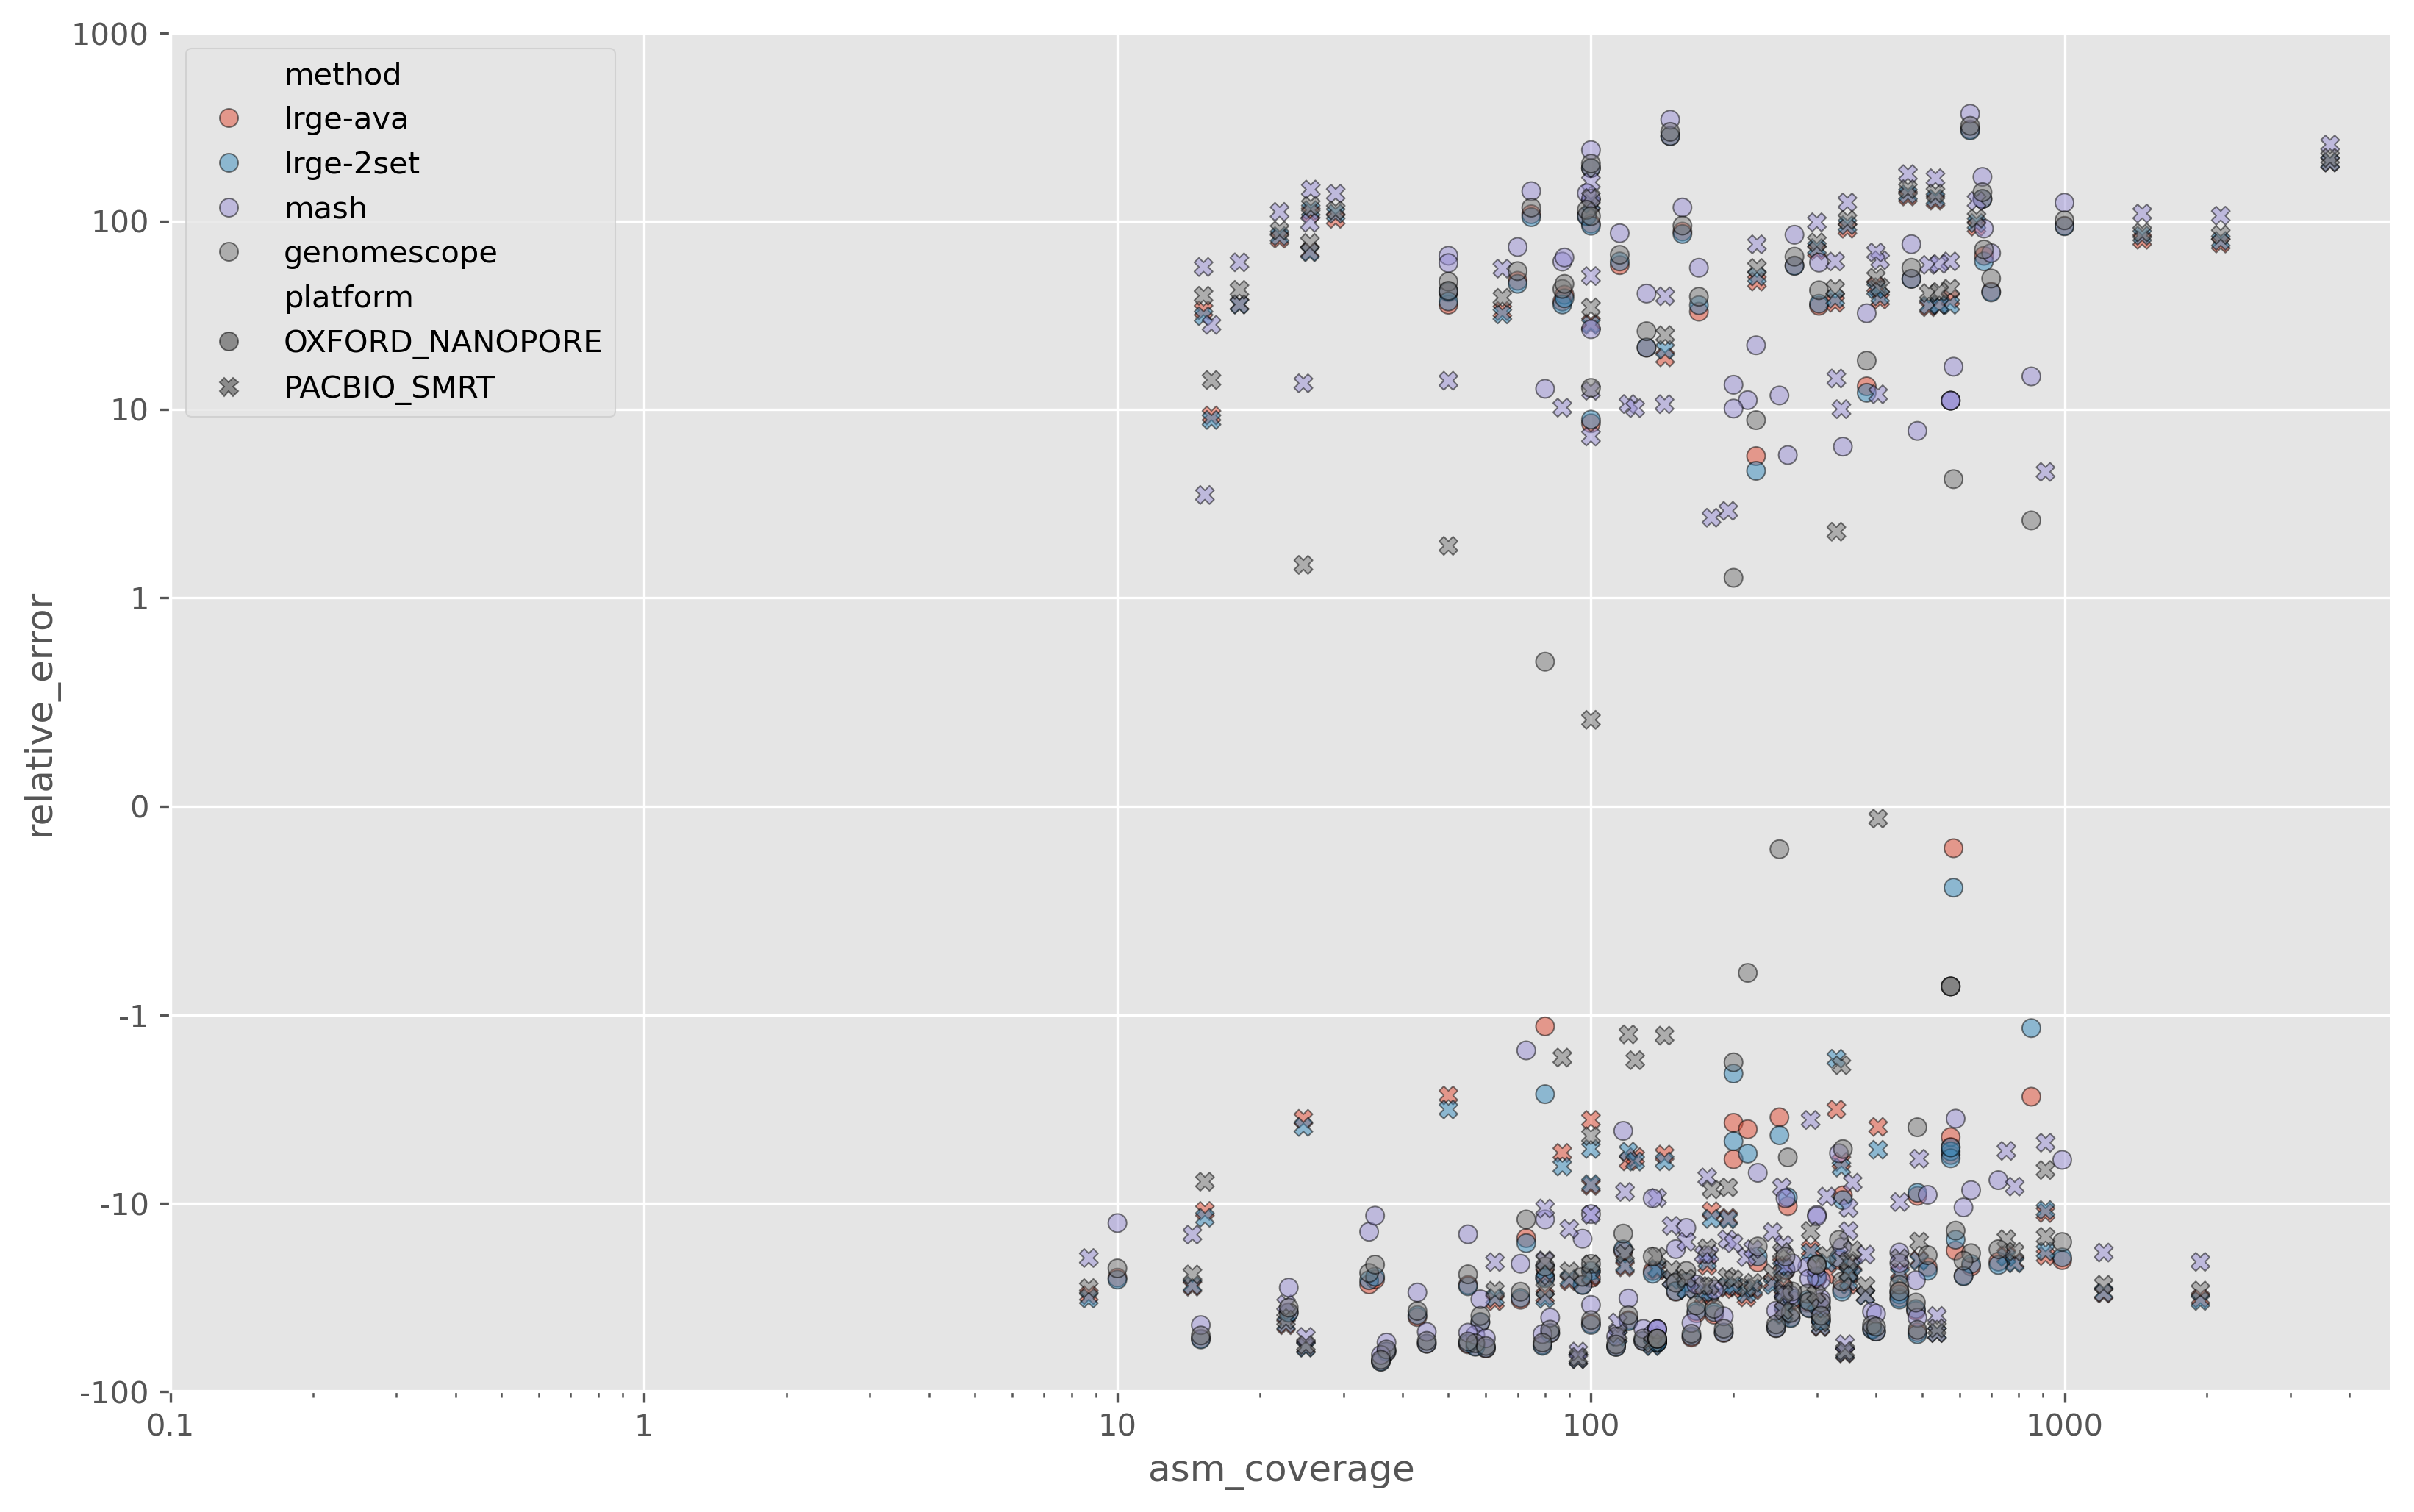

In [77]:
x = "asm_coverage"
y = "relative_error"
style = "platform"
hue = "method"
data = df
fig, ax = plt.subplots(dpi=300)
sns.scatterplot(x=x, y=y, hue=hue, style=style, data=data, ax=ax, edgecolor="black", alpha=0.5)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000]
ax.set_yscale("symlog", linthresh=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xscale("log")
xticks = [0.1, 1, 10, 100, 1000]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

Looking at CheckM stats for all the assemblies

In [79]:
asm = pd.read_csv("../config/bacteria.tsv", sep="\t")

In [80]:
asm

,Assembly Accession,Organism Name,Organism Taxonomic ID,Assembly BioProject Accession,Assembly BioSample Accession,Assembly Name,CheckM completeness,CheckM completeness percentile,CheckM contamination
0,GCF_004214875.1,'Catharanthus roseus' aster yellows phytoplasma,1193712,PRJNA522055,SAMN10923938,ASM421487v1,99.22,100.000,NaN
1,GCF_000196515.1,'Nostoc azollae' 0708,551115,PRJNA30807,SAMN02598476,ASM19651v1,96.13,100.000,0.30
2,GCF_000022305.1,[Acidovorax] ebreus TPSY,535289,PRJNA29975,SAMN00001444,ASM2230v1,100.00,100.000,0.67
3,GCF_002057455.1,[Actinomadura] parvosata subsp. kistnae,1909395,PRJNA348567,SAMN05912833,ASM205745v1,92.82,100.000,15.00
4,GCF_001542565.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA306041,SAMN04338418,ASM154256v1,99.74,100.000,0.18
...,...,...,...,...,...,...,...,...,...
43451,GCF_000576165.1,Zymomonas mobilis subsp. mobilis str. CP4 = NR...,627343,PRJNA167436,SAMN03081440,ASM57616v1,97.67,71.875,1.17
43452,GCF_000007105.1,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,264203,PRJNA12354,SAMN02603579,ASM710v1,96.91,46.875,2.39
43453,GCF_003054575.1,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,264203,PRJNA391970,SAMN07274095,ASM305457v1,98.44,100.000,3.51
43454,GCF_004168305.2,Zymomonas mobilis subsp. mobilis ZM4 = ATCC 31821,264203,PRJNA521016,SAMN10863893,ASM416830v2,98.41,87.500,3.51
